# Prepare data

## Demographic file

### Import Data

In [ ]:
import pandas as pd
from google.colab import data_table

df_demographic = pd.read_csv('https://drive.google.com/uc?id=1fpLepO_kDavpKvOpQdbBcKsItUQWQ_TN')

In [ ]:
data_table.DataTable(df_demographic[:500], include_index=False, num_rows_per_page=10)

In [ ]:
print(f"Demographic shape: {df_demographic.shape}")

Demographic shape: (371200, 17)


In [ ]:
import io

def info_with_null_percentage(df):
    # Create a StringIO buffer to capture the output of df.info()
    buffer = io.StringIO()
    df.info(buf=buffer)
    info_output = buffer.getvalue()  # Get the content of the buffer as a string

    # Calculate the percentage of null values
    null_percent = (df.isnull().mean() * 100).round(2)

    # Split the output into lines
    lines = info_output.split("\n")

    # Add a header for the "Percent Null" column
    lines[3] += "    Percent Null"
    lines[4] += "    ------------"

    # Insert the null percentage for each column
    for i, col in enumerate(df.columns):
        null_info = f"    {null_percent[col]}%"
        lines[i + 5] += null_info.rjust(15)

    # Print the modified output
    print("\n".join(lines))

In [ ]:
info_with_null_percentage(df_demographic)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371200 entries, 0 to 371199
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype      Percent Null
---  ------                      --------------   -----      ------------
 0   LABOUR_CONTRACT_TYPE        293048 non-null  float64         21.05%
 1   NUMBER_OF_DEPENDANTS        307877 non-null  float64         17.06%
 2   PERMANENT_ADDRESS_PROVINCE  315371 non-null  float64         15.04%
 3   INDUSTRY                    304094 non-null  float64         18.08%
 4   JOB                         315548 non-null  float64         14.99%
 5   COMPANY_ADDRESS_PROVINCE    262358 non-null  float64         29.32%
 6   CONTRACT_NO                 315507 non-null  float64          15.0%
 7   WEIGHT                      315684 non-null  float64         14.96%
 8   EDUCATION                   308236 non-null  float64         16.96%
 9   CUSTOMER_INCOME             315351 non-null  float64         15.05%
 10  CREDIT

### Clean Data

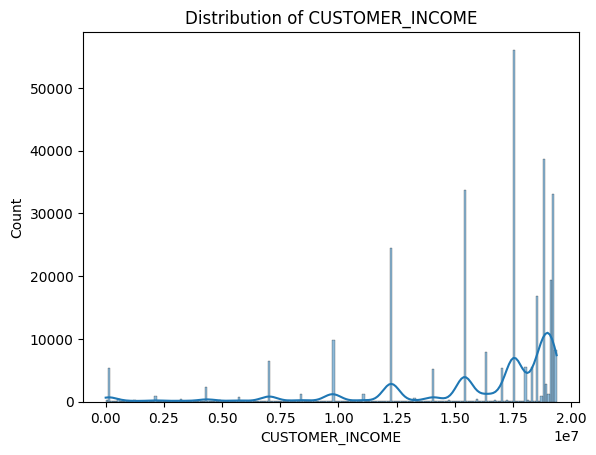

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df_demographic['CUSTOMER_INCOME'].dropna(), kde=True)
plt.title("Distribution of CUSTOMER_INCOME")
plt.show()

In [ ]:
# Save the null CONTRACT_NO to a CSV file
df_null_contract = df_demographic[df_demographic['CONTRACT_NO'].isnull()]
df_null_contract.to_csv('demographic_null_contract_rows.csv', index=False)

# Remove null CONTRACT_NO
df_demographic.dropna(subset=['CONTRACT_NO'], inplace=True)

In [ ]:
# Remove high missing observations
threshold = 0.5

# Calculate the percentage of missing values per row
missing_percent = df_demographic.isnull().mean(axis=1)
data_high_missing = df_demographic[missing_percent > threshold]

# Save rows with high missing values to a new CSV file
data_high_missing.to_csv('demographic_high_null_values_rows.csv', index=False)

# Filter out these rows to keep only those with less than the threshold of missing values
df_demographic = df_demographic[missing_percent <= threshold]
print(f"Demographic shape: {df_demographic.shape}")

Demographic shape: (307696, 17)


In [ ]:
from datetime import datetime

current_year = datetime.now().year
df_demographic['AGE'] = df_demographic['DATE_OF_BIRTH'].apply(lambda x: current_year - x if pd.notnull(x) else None)
print(f"Demographic shape: {df_demographic.shape}")

Demographic shape: (307696, 18)


In [ ]:
# Save rows with CREDITIBILITY = 0 to a CSV file
df_credit_zero = df_demographic[df_demographic['CREDITIBILITY'] == 0]
df_credit_zero.to_csv('creditibility_zero.csv', index=False)

df_demographic = df_demographic[df_demographic['CREDITIBILITY'] != 0]
print(f"Demographic shape: {df_demographic.shape}")

Demographic shape: (264057, 18)


In [ ]:
low_customer_income = df_demographic[(df_demographic['CUSTOMER_INCOME'] < 3000000) & (df_demographic['CUSTOMER_INCOME'].notnull())]
low_customer_income.to_csv('standard_customer_income.csv', index=False)

df_demographic = df_demographic[(df_demographic['CUSTOMER_INCOME'] >= 3000000) | (df_demographic['CUSTOMER_INCOME'].isnull())]
print(f"Demographic shape: {df_demographic.shape}")

Demographic shape: (257038, 18)


In [ ]:
info_with_null_percentage(df_demographic)

<class 'pandas.core.frame.DataFrame'>
Index: 257038 entries, 4 to 371196
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype      Percent Null
---  ------                      --------------   -----      ------------
 0   LABOUR_CONTRACT_TYPE        207846 non-null  float64         19.14%
 1   NUMBER_OF_DEPENDANTS        218633 non-null  float64         14.94%
 2   PERMANENT_ADDRESS_PROVINCE  218467 non-null  float64         15.01%
 3   INDUSTRY                    215812 non-null  float64         16.04%
 4   JOB                         218581 non-null  float64         14.96%
 5   COMPANY_ADDRESS_PROVINCE    185590 non-null  float64          27.8%
 6   CONTRACT_NO                 257038 non-null  float64           0.0%
 7   WEIGHT                      218655 non-null  float64         14.93%
 8   EDUCATION                   218690 non-null  float64         14.92%
 9   CUSTOMER_INCOME             217357 non-null  float64         15.44%
 10  CREDITIBILI

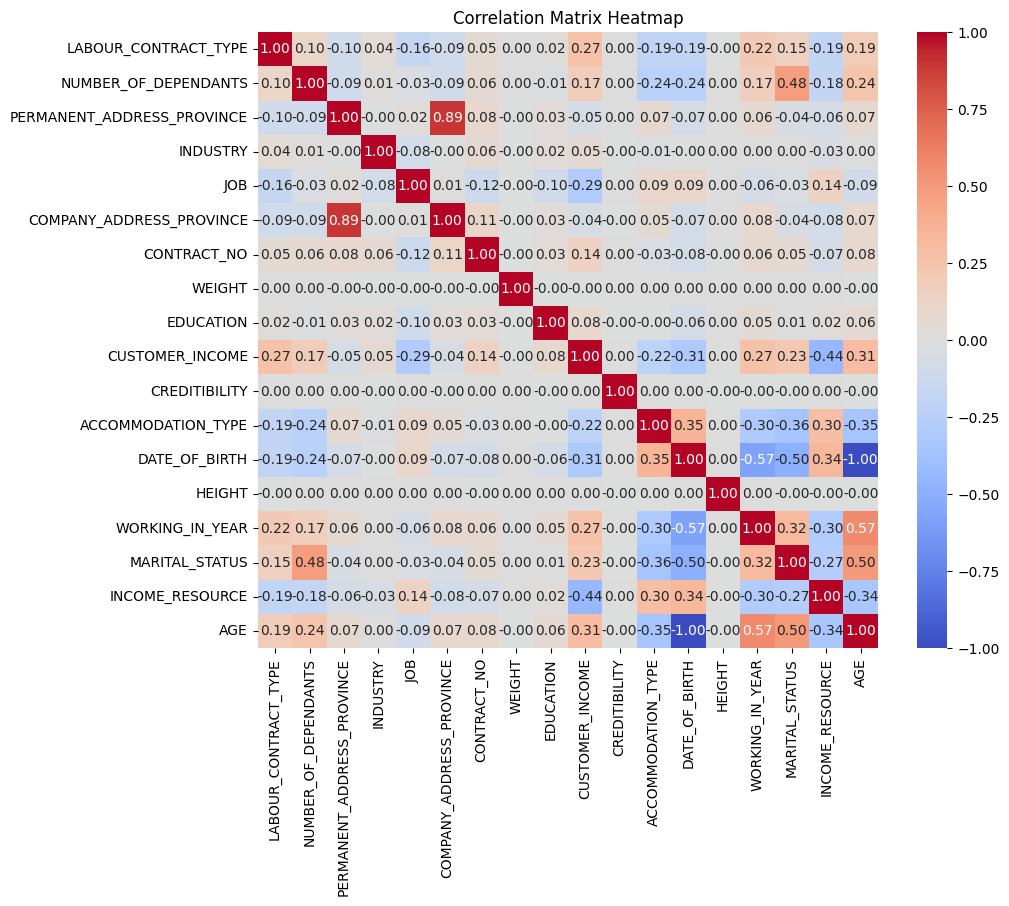

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df_demographic.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
df_demographic['HEIGHT'].skew()

0.004402294085911223

In [ ]:
df_demographic['WEIGHT'].skew()

-0.00022598791109558643

In [ ]:
df_demographic['HEIGHT'] = df_demographic['HEIGHT'].fillna(round(df_demographic['HEIGHT'].mean()))
df_demographic['WEIGHT'] = df_demographic['WEIGHT'].fillna(round(df_demographic['WEIGHT'].mean()))

In [ ]:
import numpy as np

df_demographic['BMI'] = np.round(df_demographic['WEIGHT'] / (df_demographic['HEIGHT'] / 100) ** 2, 2)
# df_demographic.drop(columns=['WEIGHT', 'HEIGHT'], inplace=True)
info_with_null_percentage(df_demographic)

<class 'pandas.core.frame.DataFrame'>
Index: 257038 entries, 4 to 371196
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype      Percent Null
---  ------                      --------------   -----      ------------
 0   LABOUR_CONTRACT_TYPE        207846 non-null  float64         19.14%
 1   NUMBER_OF_DEPENDANTS        218633 non-null  float64         14.94%
 2   PERMANENT_ADDRESS_PROVINCE  218467 non-null  float64         15.01%
 3   INDUSTRY                    215812 non-null  float64         16.04%
 4   JOB                         218581 non-null  float64         14.96%
 5   COMPANY_ADDRESS_PROVINCE    185590 non-null  float64          27.8%
 6   CONTRACT_NO                 257038 non-null  float64           0.0%
 7   WEIGHT                      257038 non-null  float64           0.0%
 8   EDUCATION                   218690 non-null  float64         14.92%
 9   CUSTOMER_INCOME             217357 non-null  float64         15.44%
 10  CREDITIBILI

### XGBoost - Impute Data

In [ ]:
import xgboost as xgb
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import pandas as pd
import numpy as np

def impute_data_with_gpu_xgboost(df, impute_cols, categorical_cols):
    """
    Impute missing values in specified columns of a DataFrame using a single XGBoost regressor with GPU acceleration.
    Categorical columns are rounded after prediction.

    Parameters:
    df (pd.DataFrame): DataFrame containing missing values.
    impute_cols (list): Columns to impute.
    categorical_cols (list): Columns treated as categorical.

    Returns:
    pd.DataFrame: DataFrame with imputed values.
    """

    # Define an XGBoost regressor with GPU support
    estimator = xgb.XGBRegressor(
        tree_method='hist',
        device='cuda',
        n_estimators=500,
        max_depth=8,
        learning_rate=0.01,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=0
    )

    # Set up IterativeImputer using the XGBoost estimator
    iter_imputer = IterativeImputer(estimator=estimator, max_iter=20, random_state=0, tol=1e-3)

    # Perform imputation on selected columns and create DataFrame for results
    imputed_data = iter_imputer.fit_transform(df[impute_cols])
    imputed_df = pd.DataFrame(imputed_data, columns=impute_cols, index=df.index)

    # Round categorical columns to integers
    imputed_df[categorical_cols] = imputed_df[categorical_cols].round().astype(int)

    # Update the original DataFrame with imputed values
    df[impute_cols] = df[impute_cols].fillna(imputed_df)

    return df


In [ ]:
# Specify which columns are continuous and which are categorical
impute_cols = ['CUSTOMER_INCOME', 'INCOME_RESOURCE', 'JOB', 'WORKING_IN_YEAR']
categorical_cols = ['INCOME_RESOURCE', 'JOB']

# Run the flexible imputation using GPU
df_imputed = impute_data_with_gpu_xgboost(df_demographic, impute_cols, categorical_cols)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:10:19] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
# Specify which columns are continuous and which are categorical
impute_cols = ['CUSTOMER_INCOME', 'INCOME_RESOURCE', 'JOB', 'LABOUR_CONTRACT_TYPE', 'WORKING_IN_YEAR', 'CREDITIBILITY']
categorical_cols = ['INCOME_RESOURCE', 'JOB', 'LABOUR_CONTRACT_TYPE', 'CREDITIBILITY']

# Run the flexible imputation using GPU
df_imputed = impute_data_with_gpu_xgboost(df_demographic, impute_cols, categorical_cols)

In [ ]:
info_with_null_percentage(df_imputed)

<class 'pandas.core.frame.DataFrame'>
Index: 257038 entries, 4 to 371196
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype      Percent Null
---  ------                      --------------   -----      ------------
 0   LABOUR_CONTRACT_TYPE        257038 non-null  float64           0.0%
 1   NUMBER_OF_DEPENDANTS        218633 non-null  float64         14.94%
 2   PERMANENT_ADDRESS_PROVINCE  218467 non-null  float64         15.01%
 3   INDUSTRY                    215812 non-null  float64         16.04%
 4   JOB                         257038 non-null  float64           0.0%
 5   COMPANY_ADDRESS_PROVINCE    185590 non-null  float64          27.8%
 6   CONTRACT_NO                 257038 non-null  float64           0.0%
 7   WEIGHT                      257038 non-null  float64           0.0%
 8   EDUCATION                   218690 non-null  float64         14.92%
 9   CUSTOMER_INCOME             257038 non-null  float64           0.0%
 10  CREDITIBILI

In [ ]:
data_table.DataTable(df_imputed[:500], include_index=False, num_rows_per_page=10)

In [ ]:
# Specify which columns are continuous and which are categorical
impute_cols = ['CUSTOMER_INCOME', 'NUMBER_OF_DEPENDANTS', 'ACCOMMODATION_TYPE', 'MARITAL_STATUS']
categorical_cols = ['NUMBER_OF_DEPENDANTS', 'ACCOMMODATION_TYPE', 'MARITAL_STATUS']

# Run the flexible imputation using GPU
df_imputed = impute_data_with_gpu_xgboost(df_demographic, impute_cols, categorical_cols)

In [ ]:
info_with_null_percentage(df_imputed)

<class 'pandas.core.frame.DataFrame'>
Index: 257038 entries, 4 to 371196
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype      Percent Null
---  ------                      --------------   -----      ------------
 0   LABOUR_CONTRACT_TYPE        257038 non-null  float64           0.0%
 1   NUMBER_OF_DEPENDANTS        257038 non-null  float64           0.0%
 2   PERMANENT_ADDRESS_PROVINCE  218467 non-null  float64         15.01%
 3   INDUSTRY                    215812 non-null  float64         16.04%
 4   JOB                         257038 non-null  float64           0.0%
 5   COMPANY_ADDRESS_PROVINCE    185590 non-null  float64          27.8%
 6   CONTRACT_NO                 257038 non-null  float64           0.0%
 7   WEIGHT                      257038 non-null  float64           0.0%
 8   EDUCATION                   218690 non-null  float64         14.92%
 9   CUSTOMER_INCOME             257038 non-null  float64           0.0%
 10  CREDITIBILI

In [ ]:
data_table.DataTable(df_imputed[:500], include_index=False, num_rows_per_page=10)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

# Separate data into training (known EDUCATION values) and prediction data (missing EDUCATION values)
training_data = df_imputed.dropna(subset=['EDUCATION']).copy()
prediction_data = df_imputed[df_imputed['EDUCATION'].isnull()].drop(columns=['EDUCATION'])

# Select relevant features
features = ['CUSTOMER_INCOME', 'JOB', 'AGE']

# Standardize 'CUSTOMER_INCOME'
scaler = StandardScaler()
training_data[['CUSTOMER_INCOME', 'AGE']] = scaler.fit_transform(training_data[['CUSTOMER_INCOME', 'AGE']])
prediction_data[['CUSTOMER_INCOME', 'AGE']] = scaler.transform(prediction_data[['CUSTOMER_INCOME', 'AGE']])

X = training_data[features]
y = training_data['EDUCATION']
X_pred = prediction_data[features]

# Train a RandomForestClassifier model
classifier = RandomForestClassifier(random_state=0)
classifier.fit(X, y)

# Predict EDUCATION values for the missing entries
predicted_education = classifier.predict(X_pred)

# Fill the missing EDUCATION values in the original dataset
df_imputed.loc[df_imputed['EDUCATION'].isnull(), 'EDUCATION'] = predicted_education

# Optional: Evaluate model performance on a validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)
classifier.fit(X_train, y_train)
val_predictions = classifier.predict(X_val)
accuracy = accuracy_score(y_val, val_predictions)
print("Accuracy on Validation Set:", accuracy)

# Display the first few rows of the updated EDUCATION column
df_imputed['EDUCATION'].head(10)

Accuracy on Validation Set: 0.5589190177877361


4     1.0
5     1.0
6     1.0
7     1.0
10    0.0
11    6.0
14    6.0
15    2.0
17    1.0
18    3.0
Name: EDUCATION, dtype: float64

In [ ]:
info_with_null_percentage(df_imputed)

<class 'pandas.core.frame.DataFrame'>
Index: 257038 entries, 4 to 371196
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype      Percent Null
---  ------                      --------------   -----      ------------
 0   LABOUR_CONTRACT_TYPE        257038 non-null  float64           0.0%
 1   NUMBER_OF_DEPENDANTS        257038 non-null  float64           0.0%
 2   PERMANENT_ADDRESS_PROVINCE  218467 non-null  float64         15.01%
 3   INDUSTRY                    215812 non-null  float64         16.04%
 4   JOB                         257038 non-null  float64           0.0%
 5   COMPANY_ADDRESS_PROVINCE    185590 non-null  float64          27.8%
 6   CONTRACT_NO                 257038 non-null  float64           0.0%
 7   WEIGHT                      257038 non-null  float64           0.0%
 8   EDUCATION                   257038 non-null  float64           0.0%
 9   CUSTOMER_INCOME             257038 non-null  float64           0.0%
 10  CREDITIBILI

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error


# Separate data into training (known AGE values) and prediction data (missing AGE values)
training_data = df_imputed.dropna(subset=['AGE']).copy()
prediction_data = df_imputed[df_imputed['AGE'].isnull()].drop(columns=['AGE'])

# Select relevant features
features = ['CUSTOMER_INCOME', 'JOB', 'WORKING_IN_YEAR', 'MARITAL_STATUS']

X = training_data[features]
y = training_data['AGE']
X_pred = prediction_data[features]

# Train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X, y)

# Predict AGE values for the missing entries, apply minimum age threshold, and convert to integer
predicted_ages = linear_model.predict(X_pred)
predicted_ages = [int(max(18, round(age))) for age in predicted_ages]  # Ensures age is an integer and above 18

# Fill the missing AGE values in the original dataset
df_imputed.loc[df_imputed['AGE'].isnull(), 'AGE'] = predicted_ages

In [ ]:
import numpy as np

def fill_missing_with_random_sampling(df, column):
    """
    Fill missing values in a column using random sampling based on the existing value distribution.

    Parameters:
    df (pd.DataFrame): The DataFrame with missing values.
    column (str): The column name where missing values will be filled.
    """
    # Get the value distribution of the column
    value_counts = df[column].value_counts(normalize=True)

    # Sample from existing values based on their distribution
    missing_indices = df[column].isnull()
    df.loc[missing_indices, column] = np.random.choice(
        value_counts.index,
        size=missing_indices.sum(),
        p=value_counts.values
    )


In [ ]:
info_with_null_percentage(df_imputed)

<class 'pandas.core.frame.DataFrame'>
Index: 257038 entries, 4 to 371196
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype      Percent Null
---  ------                      --------------   -----      ------------
 0   LABOUR_CONTRACT_TYPE        257038 non-null  float64           0.0%
 1   NUMBER_OF_DEPENDANTS        257038 non-null  float64           0.0%
 2   PERMANENT_ADDRESS_PROVINCE  218467 non-null  float64         15.01%
 3   INDUSTRY                    215812 non-null  float64         16.04%
 4   JOB                         257038 non-null  float64           0.0%
 5   COMPANY_ADDRESS_PROVINCE    185590 non-null  float64          27.8%
 6   CONTRACT_NO                 257038 non-null  float64           0.0%
 7   WEIGHT                      257038 non-null  float64           0.0%
 8   EDUCATION                   257038 non-null  float64           0.0%
 9   CUSTOMER_INCOME             257038 non-null  float64           0.0%
 10  CREDITIBILI

In [ ]:
import numpy as np
df_imputed['WORKING_IN_YEAR'] = np.round(df_imputed['WORKING_IN_YEAR'])
df_imputed['CUSTOMER_INCOME'] = np.round(df_imputed['CUSTOMER_INCOME'])

In [ ]:
data_table.DataTable(df_imputed[:500], include_index=False, num_rows_per_page=10)

In [ ]:
df_imputed.to_csv('demographic_cleaned.csv', index=False)

## Loan Origin file

### Import file

In [ ]:
df_loan_origin = pd.read_csv('https://drive.google.com/uc?id=19hxSCZDCp6BYW-LX6zjAOGYvcXgjoVf2')

In [ ]:
print(f"Loan origin shape: {df_loan_origin.shape}")

Loan origin shape: (371200, 14)


In [ ]:
info_with_null_percentage(df_loan_origin)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371200 entries, 0 to 371199
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype      Percent Null
---  ------                --------------   -----      ------------
 0   DISBURSEMENT_CHANNEL  315211 non-null  float64         15.08%
 1   LIQUIDITY             315574 non-null  float64         14.99%
 2   INSURANCE_COMPANY     315396 non-null  float64         15.03%
 3   INSURANCE_RATE        315613 non-null  float64         14.97%
 4   DISBURSEMENT_DATE     315470 non-null  object          15.01%
 5   CONTRACT_NO           315643 non-null  float64         14.97%
 6   RATE                  315635 non-null  float64         14.97%
 7   HAS_INSURANCE         315334 non-null  object          15.05%
 8   PRODUCT_CATEGORY      315447 non-null  float64         15.02%
 9   LOAN_TERM             315169 non-null  float64         15.09%
 10  MONTH_INTEREST        315292 non-null  float64         15.06%
 11  LOAN_PURPOS

### Clean Data

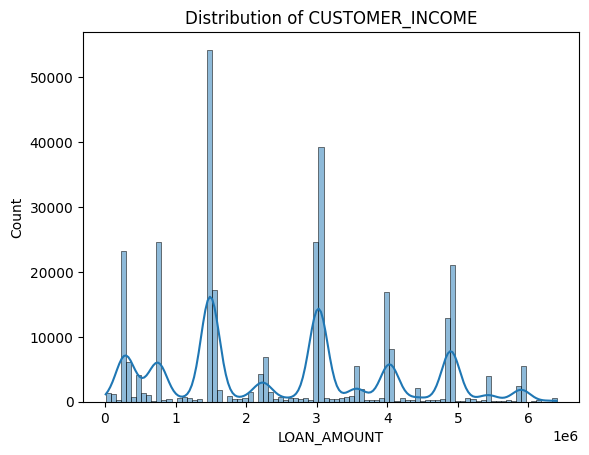

In [ ]:
sns.histplot(df_loan_origin['LOAN_AMOUNT'].dropna(), kde=True)
plt.title("Distribution of CUSTOMER_INCOME")
plt.show()

In [ ]:
# Save the null CONTRACT_NO to a CSV file
df_null_contract = df_loan_origin[df_loan_origin['CONTRACT_NO'].isnull()]
df_null_contract.to_csv('loan_null_contract_rows.csv', index=False)

# Remove null CONTRACT_NO
df_loan_origin.dropna(subset=['CONTRACT_NO'], inplace=True)

In [ ]:
# Remove high missing observations
threshold = 0.5

# Calculate the percentage of missing values per row
missing_percent = df_loan_origin.isnull().mean(axis=1)
data_high_missing = df_loan_origin[missing_percent > threshold]

# Save rows with high missing values to a new CSV file
data_high_missing.to_csv('high_null_values_rows.csv', index=False)

# Filter out these rows to keep only those with less than the threshold of missing values
df_loan_origin = df_loan_origin[missing_percent <= threshold]
print(f"Loan_origin shape: {df_loan_origin.shape}")

Loan_origin shape: (315600, 14)


In [ ]:
# Save rows with LIQUIDITY = 0 to a CSV file
df_credit_zero = df_loan_origin[df_loan_origin['LIQUIDITY'] == 0]
df_credit_zero.to_csv('liquidity_zero.csv', index=False)

df_loan_origin = df_loan_origin[df_loan_origin['LIQUIDITY'] != 0]
print(f"Loan_origin shape: {df_loan_origin.shape}")

Loan_origin shape: (270873, 14)


In [ ]:
import pandas as pd

# Step 1: Separate rows with non-null LOAN_AMOUNT
non_null_loan = df_loan_origin[df_loan_origin['LOAN_AMOUNT'].notnull()]
null_loan = df_loan_origin[df_loan_origin['LOAN_AMOUNT'].isnull()]

# Step 2: Calculate Q1, Q3, and IQR for the LOAN_AMOUNT column
Q1 = non_null_loan['LOAN_AMOUNT'].quantile(0.25)
Q3 = non_null_loan['LOAN_AMOUNT'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Identify outliers
outliers = non_null_loan[
    (non_null_loan['LOAN_AMOUNT'] < lower_bound) |
    (non_null_loan['LOAN_AMOUNT'] > upper_bound)
]

# Save outliers to a CSV file
outliers.to_csv('loan_origin - loan_amount_outliers.csv', index=False)

# Step 4: Remove outliers from the non-null CUSTOMER_INCOME rows
filtered_non_null_loan = non_null_loan[
    (non_null_loan['LOAN_AMOUNT'] >= lower_bound) &
    (non_null_loan['LOAN_AMOUNT'] <= upper_bound)
]

# Step 5: Combine the cleaned non-null rows with the original null rows
df_loan_origin = pd.concat([filtered_non_null_loan, null_loan], ignore_index=True)
print(f"Loan_origin shape: {df_loan_origin.shape}")


Loan_origin shape: (270873, 14)


In [ ]:
# Step 1: Update HAS_INSURANCE based on INSURANCE_RATE
df_loan_origin.loc[df_loan_origin['INSURANCE_RATE'] == 0, 'HAS_INSURANCE'] = "NO"
df_loan_origin.loc[df_loan_origin['INSURANCE_RATE'] > 0 , 'HAS_INSURANCE'] = "YES"

# Step 2: Remove rows where HAS_INSURANCE is "NO"
df_loan_origin = df_loan_origin[df_loan_origin["HAS_INSURANCE"] != "NO"]

# Step 3: Display the shape and information
print(df_loan_origin.shape)
print(info_with_null_percentage(df_loan_origin))

(270850, 14)
<class 'pandas.core.frame.DataFrame'>
Index: 270850 entries, 0 to 270872
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype      Percent Null
---  ------                --------------   -----      ------------
 0   DISBURSEMENT_CHANNEL  230025 non-null  float64         15.07%
 1   LIQUIDITY             223659 non-null  float64         17.42%
 2   INSURANCE_COMPANY     230239 non-null  float64         14.99%
 3   INSURANCE_RATE        230142 non-null  float64         15.03%
 4   DISBURSEMENT_DATE     230172 non-null  object          15.02%
 5   CONTRACT_NO           270850 non-null  float64           0.0%
 6   RATE                  230264 non-null  float64         14.98%
 7   HAS_INSURANCE         264614 non-null  object            2.3%
 8   PRODUCT_CATEGORY      230354 non-null  float64         14.95%
 9   LOAN_TERM             229965 non-null  float64          15.1%
 10  MONTH_INTEREST        230103 non-null  float64         15.04%
 11  LOA

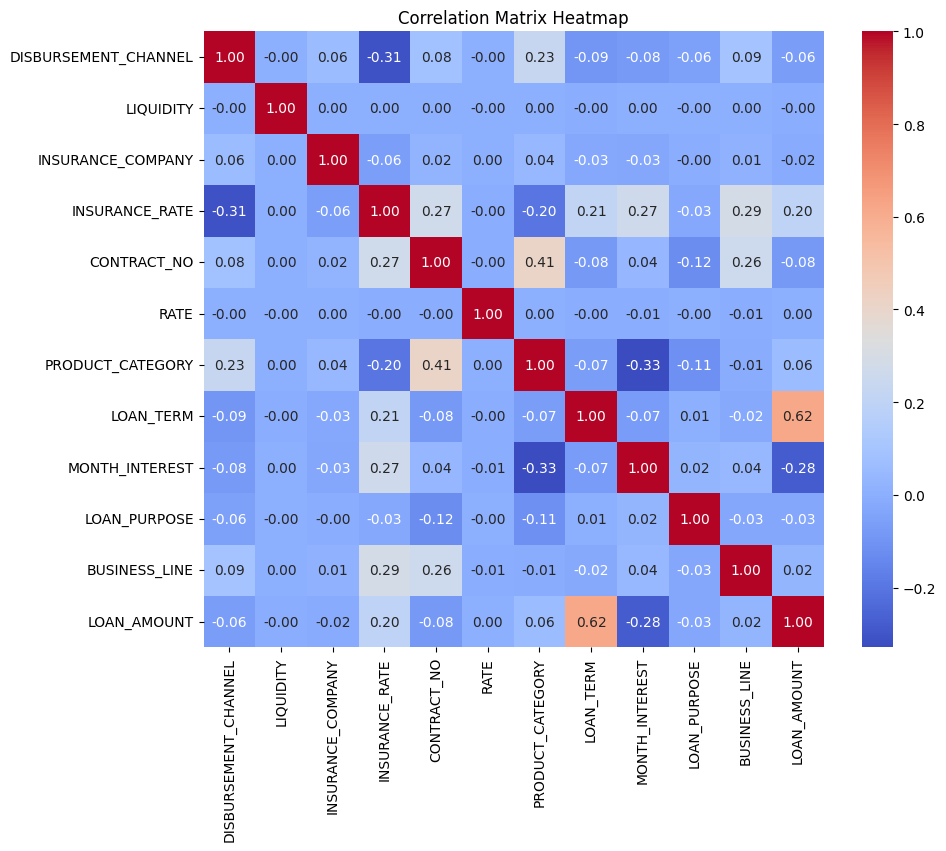

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df_loan_origin.drop(columns=['DISBURSEMENT_DATE', 'HAS_INSURANCE']).corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

### lightGBM - Impute data

In [ ]:
import warnings
import pandas as pd
from lightgbm import LGBMRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.exceptions import ConvergenceWarning

def impute_data_with_lightgbm(df, impute_cols, categorical_cols):
    """
    Impute missing values in specific columns of a DataFrame using a single LightGBM regressor with IterativeImputer.

    Parameters:
    df (pd.DataFrame): The DataFrame with missing values to impute.
    impute_cols (list): List of column names to impute.
    categorical_cols (list): List of categorical columns to use in prediction.

    Returns:
    pd.DataFrame: DataFrame with specified columns' missing values imputed.
    """

    # Define a single LightGBM regressor for all imputations
    estimator = LGBMRegressor(
        n_estimators=500,
        max_depth=10,
        min_child_samples=20,
        random_state=42,
        n_jobs=-1,
        force_row_wise=True,  # Optimize threading overhead
        verbosity=-1  # Suppress LightGBM warnings for cleaner output
    )

    # Prepare the data for imputation
    prediction_df = df[impute_cols]

    # Initialize and apply IterativeImputer with the single estimator
    iter_imputer = IterativeImputer(
        estimator=estimator,
        max_iter=10,
        tol=1e-4,
        random_state=42,
        n_nearest_features=None  # Use all features for imputation
    )

    # Suppress ConvergenceWarning and fit-transform imputer
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning)
        imputed_data = iter_imputer.fit_transform(prediction_df)

    # Convert the imputed data back to a DataFrame
    imputed_df = pd.DataFrame(imputed_data, columns=impute_cols, index=df.index)

    # Round and convert categorical columns to integers
    imputed_df[categorical_cols] = imputed_df[categorical_cols].round().astype(int)

    # Update the original DataFrame with imputed values only once
    df.update(imputed_df)

    return df


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# Apply the function to 'INSURANCE_COMPANY' columns
fill_missing_with_random_sampling(df_loan_origin, 'INSURANCE_COMPANY')

In [ ]:
# Group 1: Impute 'DISBURSEMENT_CHANNEL', 'PRODUCT_CATEGORY', 'BUSINESS_LINE'
impute_cols = ['DISBURSEMENT_CHANNEL', 'PRODUCT_CATEGORY', 'BUSINESS_LINE', 'INSURANCE_RATE']
categorical_cols = ['DISBURSEMENT_CHANNEL', 'PRODUCT_CATEGORY', 'BUSINESS_LINE']
df_imputed = impute_data_with_lightgbm(df_loan_origin, impute_cols, categorical_cols)

In [ ]:
info_with_null_percentage(df_imputed)

<class 'pandas.core.frame.DataFrame'>
Index: 270850 entries, 0 to 270872
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype      Percent Null
---  ------                --------------   -----      ------------
 0   DISBURSEMENT_CHANNEL  270850 non-null  float64           0.0%
 1   LIQUIDITY             223659 non-null  float64         17.42%
 2   INSURANCE_COMPANY     270850 non-null  float64           0.0%
 3   INSURANCE_RATE        270850 non-null  float64           0.0%
 4   DISBURSEMENT_DATE     230172 non-null  object          15.02%
 5   CONTRACT_NO           270850 non-null  float64           0.0%
 6   RATE                  230264 non-null  float64         14.98%
 7   HAS_INSURANCE         264614 non-null  object            2.3%
 8   PRODUCT_CATEGORY      270850 non-null  float64           0.0%
 9   LOAN_TERM             229965 non-null  float64          15.1%
 10  MONTH_INTEREST        230103 non-null  float64         15.04%
 11  LOAN_PURPOSE    

In [ ]:
# Group 2: Impute 'INSURANCE_RATE', 'RATE', 'LOAN_TERM', 'MONTH_INTEREST'
impute_cols=['INSURANCE_RATE', 'LOAN_TERM', 'MONTH_INTEREST', 'LOAN_PURPOSE', 'DISBURSEMENT_CHANNEL', 'PRODUCT_CATEGORY', 'RATE']
categorical_cols=['DISBURSEMENT_CHANNEL', 'PRODUCT_CATEGORY', 'LOAN_PURPOSE', 'RATE']
df_imputed = impute_data_with_lightgbm(df_loan_origin, impute_cols, categorical_cols)

In [ ]:
# Group 3: Impute 'LIQUIDITY', 'LOAN_AMOUNT'
impute_cols=['LIQUIDITY', 'LOAN_AMOUNT', 'PRODUCT_CATEGORY', 'BUSINESS_LINE']
categorical_cols=['PRODUCT_CATEGORY', 'BUSINESS_LINE', 'LIQUIDITY']
df_imputed = impute_data_with_lightgbm(df_loan_origin, impute_cols, categorical_cols)

In [ ]:
data_table.DataTable(df_imputed[:500], include_index=False, num_rows_per_page=10)

In [ ]:
df_imputed['LOAN_TERM'] = (df_imputed['LOAN_TERM'] / 3).round() * 3
df_imputed['LOAN_AMOUNT'] = np.round(df_imputed['LOAN_AMOUNT'])
df_imputed['MONTH_INTEREST'] = np.round(df_imputed['MONTH_INTEREST'], 1)
df_imputed.loc[df_imputed['INSURANCE_RATE'] == 0, 'HAS_INSURANCE'] = "NO"
df_imputed.loc[df_imputed['INSURANCE_RATE'] > 0 , 'HAS_INSURANCE'] = "YES"

allowed_insurance_rates = list(np.arange(0, 4.25, 0.25))
df_imputed['INSURANCE_RATE'] = df_imputed['INSURANCE_RATE'].apply(lambda x: min(allowed_insurance_rates, key=lambda y: abs(y - x)) if pd.notnull(x) else np.nan)

data_table.DataTable(df_imputed[:500], include_index=False, num_rows_per_page=10)

In [ ]:
info_with_null_percentage(df_imputed)

<class 'pandas.core.frame.DataFrame'>
Index: 270850 entries, 0 to 270872
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype      Percent Null
---  ------                --------------   -----      ------------
 0   DISBURSEMENT_CHANNEL  270850 non-null  float64           0.0%
 1   LIQUIDITY             270850 non-null  float64           0.0%
 2   INSURANCE_COMPANY     270850 non-null  float64           0.0%
 3   INSURANCE_RATE        270850 non-null  float64           0.0%
 4   DISBURSEMENT_DATE     230172 non-null  object          15.02%
 5   CONTRACT_NO           270850 non-null  float64           0.0%
 6   RATE                  270850 non-null  float64           0.0%
 7   HAS_INSURANCE         270850 non-null  object            0.0%
 8   PRODUCT_CATEGORY      270850 non-null  float64           0.0%
 9   LOAN_TERM             270850 non-null  float64           0.0%
 10  MONTH_INTEREST        270850 non-null  float64           0.0%
 11  LOAN_PURPOSE    

In [ ]:
df_imputed.to_csv('loan_origin_cleaned.csv', index=False)

# Define customer demographic

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset provided by the user (this is just a portion, in real scenario we would load the full dataset)
data = pd.read_csv("https://drive.google.com/uc?id=1I02tu_3gY9fXP5X3S5DLSArNOdMr165v")
df = pd.DataFrame(data)
df.head(10)

LABOUR_CONTRACT_TYPE  NUMBER_OF_DEPENDANTS  PERMANENT_ADDRESS_PROVINCE  \
0                     4                     3                         NaN   
1                     2                     1                        96.0   
2                     2                     0                        48.0   
3                     4                     2                        89.0   
4                     4                     3                        42.0   
5                     4                     0                        48.0   
6                     4                     0                        70.0   
7                     4                     1                        51.0   
8                     4                     0                        56.0   
9                     4                     1                         NaN   

   INDUSTRY  JOB  COMPANY_ADDRESS_PROVINCE  CONTRACT_NO  WEIGHT  EDUCATION  \
0      18.0    9                       NaN       571556      74          1   
1       NaN    0                      75.0       569818      85          1   
2      18.0    1                      48.0       569794      75          1   
3      18.0    9                       NaN       810070      69          1   
4      18.0    1                       NaN       569905      75          0   
5      18.0    4                      48.0       569915      67          6   
6       NaN    6                       1.0       569760      59          6   
7       0.0    5                      51.0       569600      75          2   
8      18.0    7                       NaN       810071      68          1   
9       7.0    1                      96.0       569729      95          3   

   CUSTOMER_INCOME  CREDITIBILITY  ACCOMMODATION_TYPE  DATE_OF_BIRTH  HEIGHT  \
0         17533000              2                   0         1974.0     172   
1         17533000              1                   1            NaN     161   
2         17018000              3                   0         1991.0     164   
3          7025000              3                   1         1991.0     159   
4         18523806              4                   0         1991.0     164   
5          9747000              2                   3         1996.0     164   
6         15413000              5                   1         1996.0     162   
7         18808000              2                   1         1991.0     140   
8         16355000              2                   0         1963.0     164   
9         17565502              5                   0         1978.0     157   

   WORKING_IN_YEAR  MARITAL_STATUS  INCOME_RESOURCE  AGE    BMI  
0                8               2                5   50  25.01  
1                2               2                1   36  32.79  
2                1               0                5   33  27.89  
3                5               2                5   33  27.29  
4                5               2                5   33  27.89  
5                0               1                5   28  24.91  
6                3               0                5   28  22.48  
7                5               2                1   33  38.27  
8               13               2                5   61  25.28  
9               20               2                5   46  38.54

1. LABOUR_CONTRACT_TYPE: The type of labor contract the customer has.
2. NUMBER_OF_DEPENDANTS: The number of dependants the customer has.
3. PERMANENT_ADDRESS_PROVINCE: The province associated with the customer's permanent address.
4. INDUSTRY: The industry the customer works in.
5. JOB: The job type of the customer.
6. COMPANY_ADDRESS_PROVINCE: The province where the customer's company is located.
7. CONTRACT_NO: A unique identifier for the contract.
8. WEIGHT: The weight of the customer (possibly for analysis of health-related factors).
9. EDUCATION: The education level of the customer.
10. CUSTOMER_INCOME: The income of the customer.
11. CREDITIBILITY: A rating of the customer's creditworthiness.
12. ACCOMMODATION_TYPE: The type of accommodation the customer lives in.
13. DATE_OF_BIRTH: The customer's year of birth.
14. HEIGHT: The customer's height.
15. WORKING_IN_YEAR: The number of years the customer has been working.
16. MARITAL_STATUS: The marital status of the customer.
17. INCOME_RESOURCE: The source of the customer's income.
18. AGE: The customer's age.
19. BMI: The customer's Body Mass Index

Since we already have BMI (the customer's Body Mass Index), column `HEIGHT` and `WEIGHT` is unnecessary.

In [ ]:
# Read file loan_origin
loan_data = pd.read_csv("https://drive.google.com/uc?id=1DqVGyi982YdUbzmLYMiWsA_uSMMTiIz6")
fill_missing_with_random_sampling(loan_data, "DISBURSEMENT_DATE")

# Merging demographic and loan data on 'CONTRACT_NO' to analyze customer demographics who borrowed loans in 2022 and 2023.
merged_data = pd.merge(df, loan_data, on='CONTRACT_NO')
print(f"Merged data shape: {merged_data.shape}")

Merged data shape: (187511, 32)


In [ ]:
# Dropping the irrelevant columns
merged_data = merged_data.drop(['HEIGHT', 'WEIGHT','DATE_OF_BIRTH'],axis =1)
merged_data.head(10)

LABOUR_CONTRACT_TYPE  NUMBER_OF_DEPENDANTS  PERMANENT_ADDRESS_PROVINCE  \
0                     2                     1                        96.0   
1                     2                     0                        48.0   
2                     4                     0                        48.0   
3                     4                     0                        70.0   
4                     4                     1                        51.0   
5                     4                     0                        56.0   
6                     4                     1                         NaN   
7                     4                     0                        74.0   
8                     4                     2                        68.0   
9                     2                     1                        84.0   

   INDUSTRY  JOB  COMPANY_ADDRESS_PROVINCE  CONTRACT_NO  EDUCATION  \
0       NaN    0                      75.0       569818          1   
1      18.0    1                      48.0       569794          1   
2      18.0    4                      48.0       569915          6   
3       NaN    6                       1.0       569760          6   
4       0.0    5                      51.0       569600          2   
5      18.0    7                       NaN       810071          1   
6       7.0    1                      96.0       569729          3   
7       6.0    1                       NaN       570415          6   
8       NaN    6                      68.0       570481          5   
9      18.0    9                      74.0       570277          1   

   CUSTOMER_INCOME  CREDITIBILITY  ...  INSURANCE_RATE  DISBURSEMENT_DATE  \
0         17533000              1  ...            3.75            2023-09   
1         17018000              3  ...            3.75            2023-09   
2          9747000              2  ...            3.75            2023-10   
3         15413000              5  ...            3.75            2023-09   
4         18808000              2  ...            3.75            2023-09   
5         16355000              2  ...            3.75            2023-09   
6         17565502              5  ...            3.75            2023-09   
7         19232000              4  ...            3.75            2023-08   
8         19183000              4  ...            3.75            2023-09   
9         12264000              5  ...            3.75            2023-09   

   RATE  HAS_INSURANCE  PRODUCT_CATEGORY  LOAN_TERM  MONTH_INTEREST  \
0     3            YES                 2         27             2.0   
1     4            YES                 3         24             1.7   
2     5            YES                 0         24             1.7   
3     1            YES                 0         27             1.7   
4     1            YES                 5         24             1.3   
5     3            YES                 6         24             2.2   
6     2            YES                 1         18             3.2   
7     2            YES                 2         36             1.8   
8     1            YES                 3         24             1.7   
9     1            YES                 0         30             2.3   

   LOAN_PURPOSE  BUSINESS_LINE  LOAN_AMOUNT  
0             6              0      2910000  
1             3              0      2250000  
2             6              0      4230000  
3             3              0      1980000  
4             6              0      3778014  
5             3              0      1788615  
6             3              0      1520000  
7             3              0      4910000  
8             3              0      5910000  
9             1              0      2250000  

[10 rows x 29 columns]

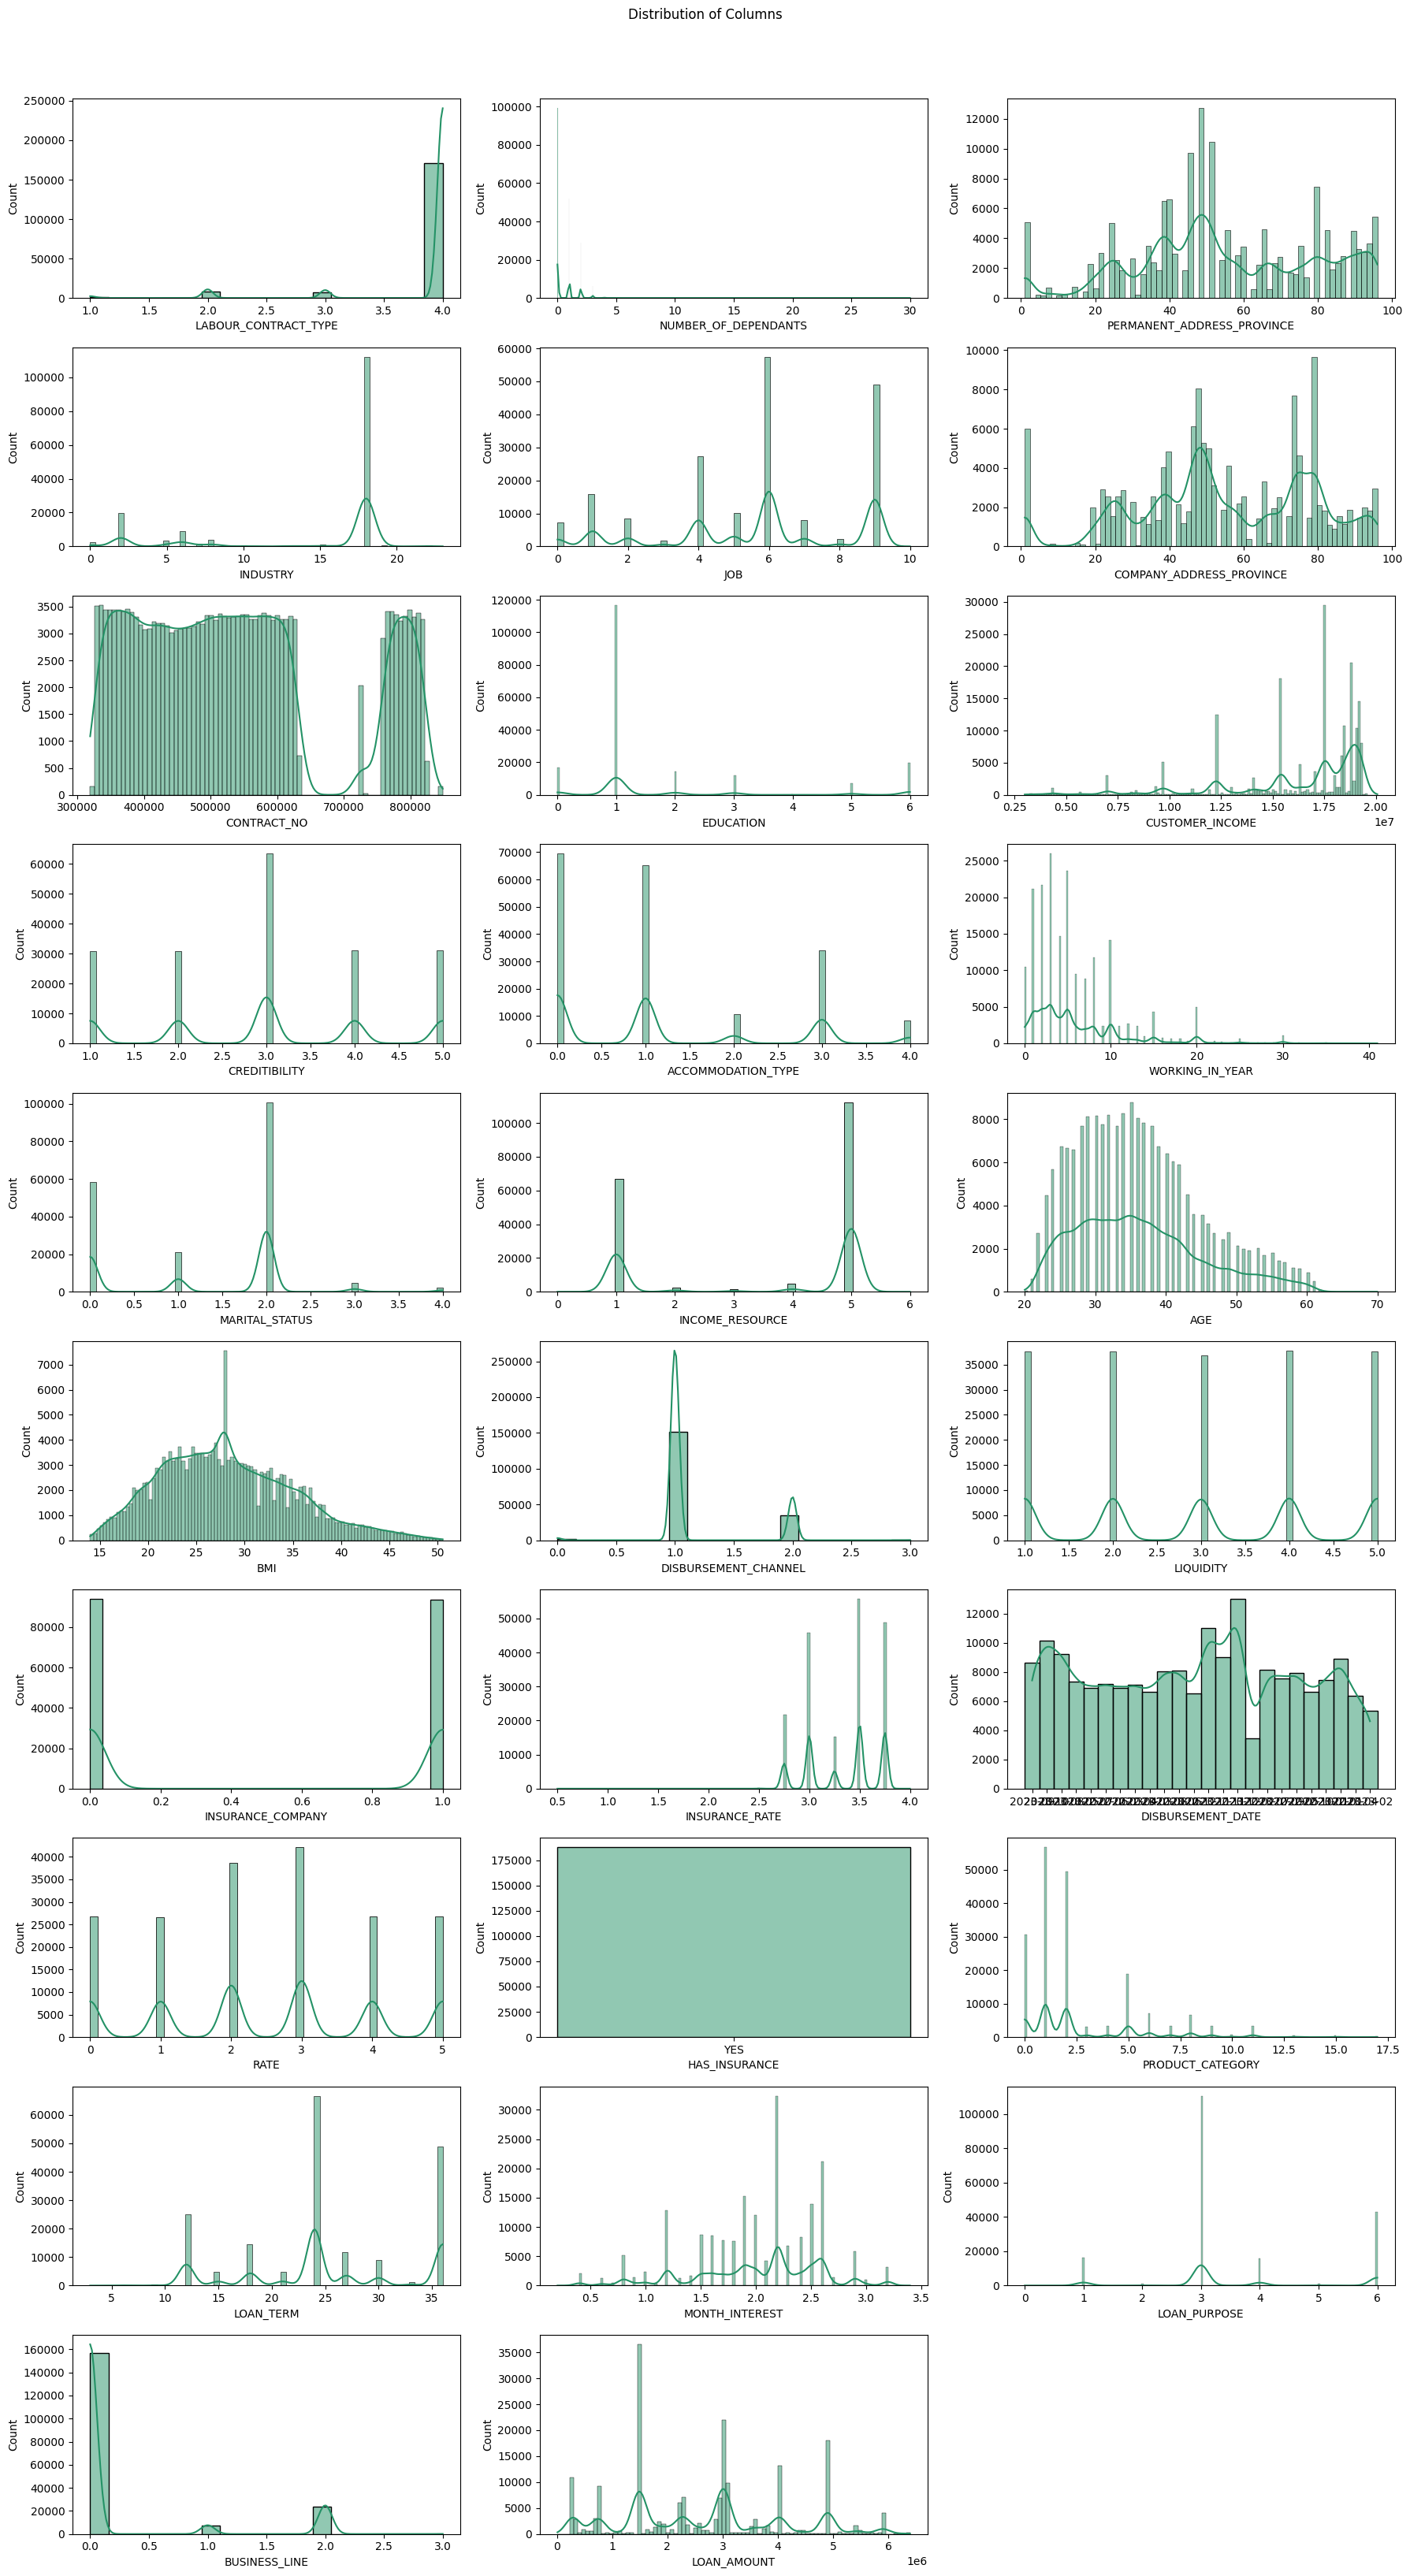

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the seaborn palette
sns.set_palette('summer')

# Adjust the subplot grid size to accommodate all columns
fig, ax = plt.subplots(10, 3, figsize=(18, 32))  # Increased rows to 7 (19 columns / 3 columns per row ≈ 6.33, rounded up to 7)

# Flatten the ax array to simplify indexing
ax = ax.flatten()

# Loop through all columns and plot their distribution
for i, col in enumerate(merged_data.columns):
    sns.histplot(merged_data[col], kde=True, ax=ax[i])  # Now use ax[i] to index the flattened array

# Remove any remaining empty plots
for j in range(len(merged_data.columns), len(ax)):
    fig.delaxes(ax[j])

fig.suptitle('Distribution of Columns', y=1.02)
plt.tight_layout()
plt.show()

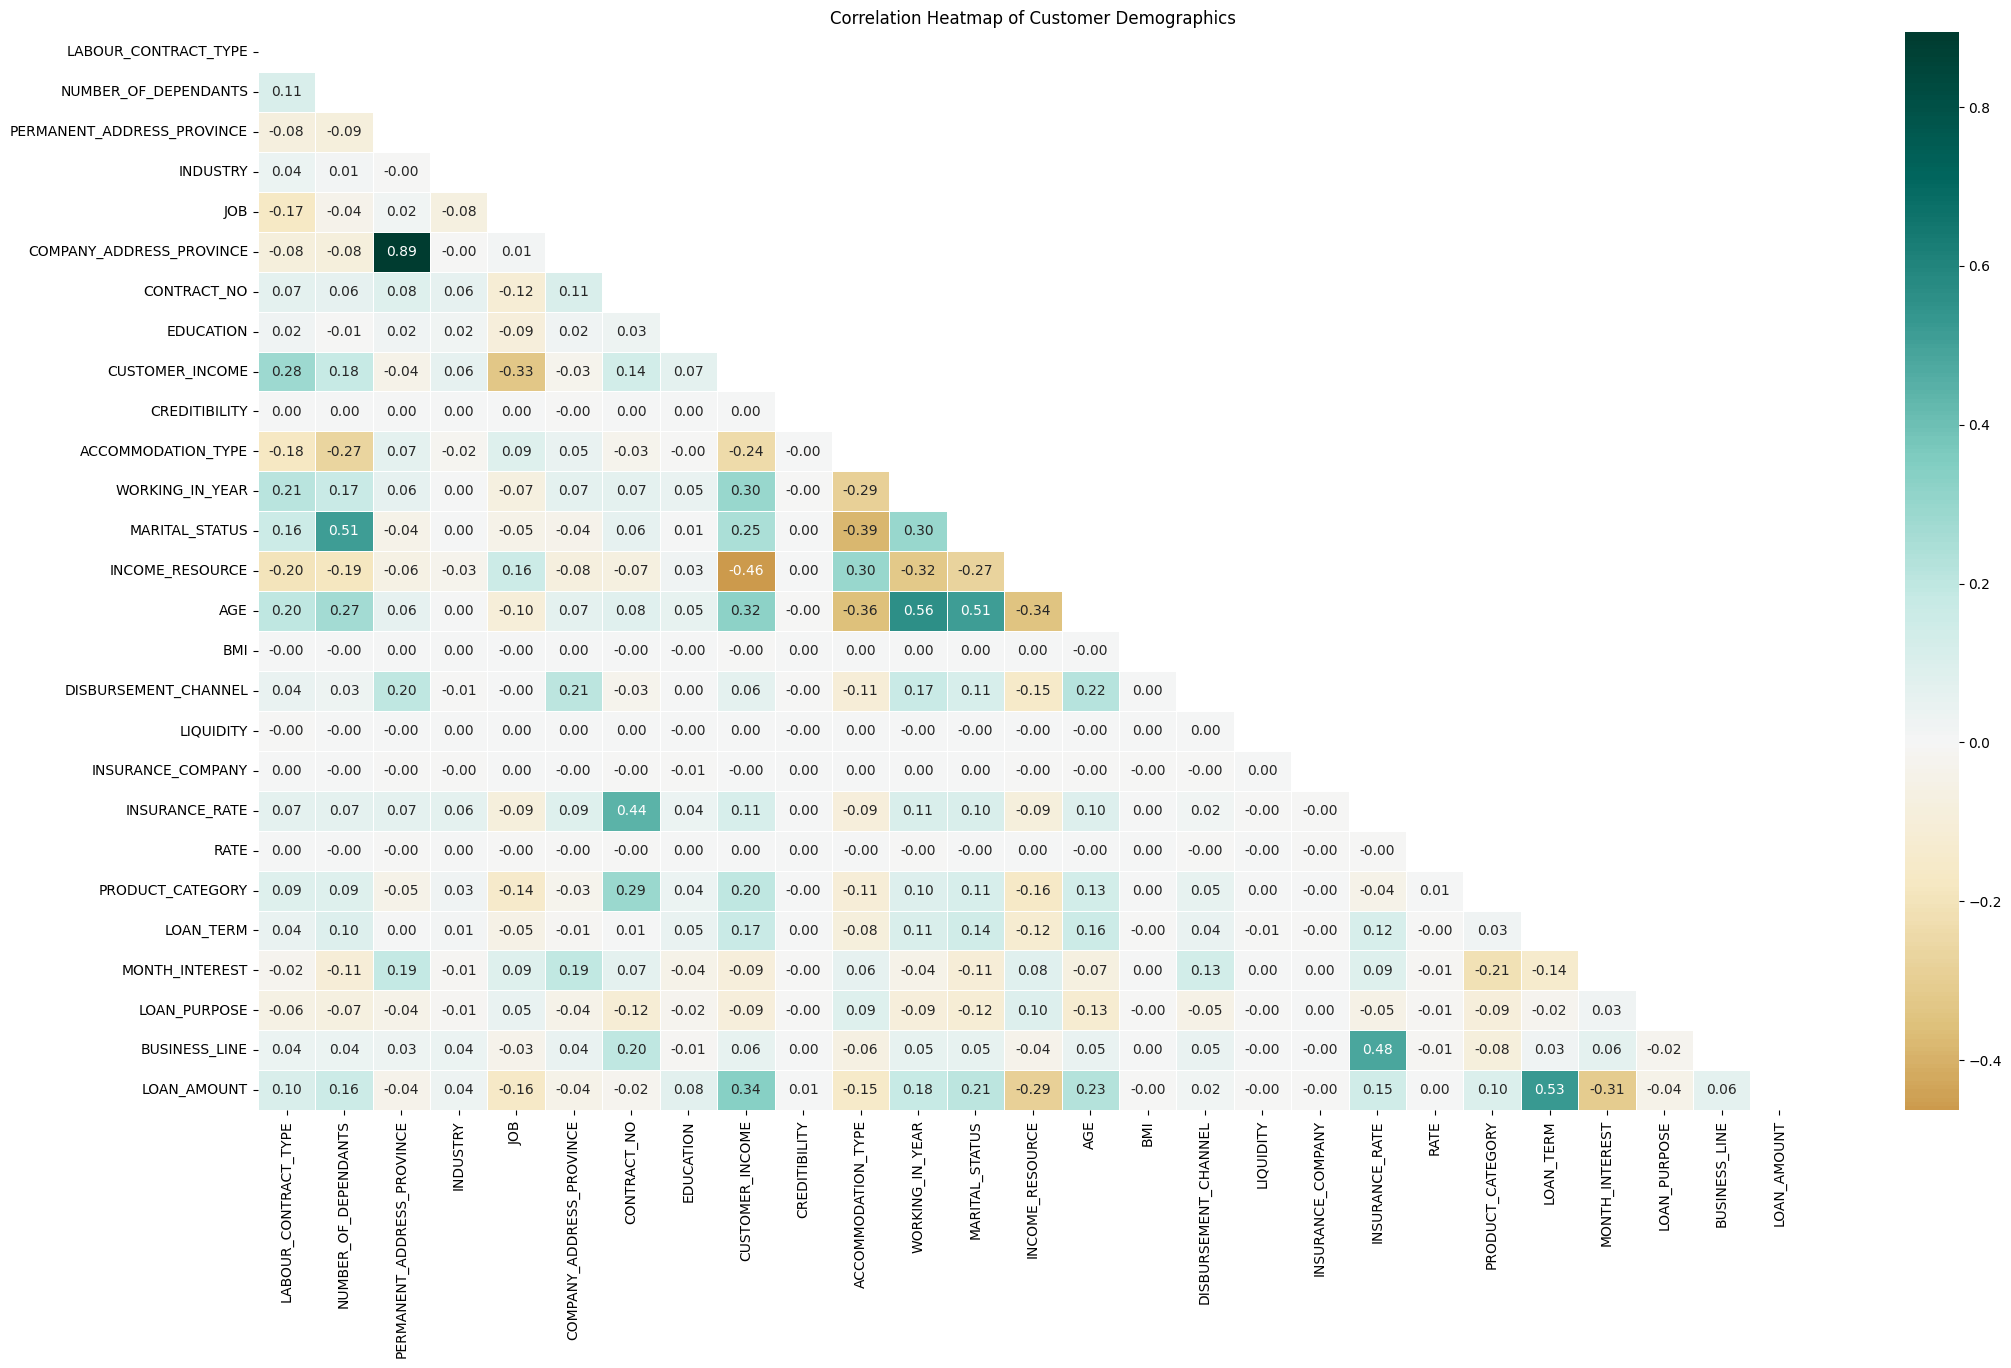

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate the correlation matrix
corr_matrix = merged_data.drop(["DISBURSEMENT_DATE", "HAS_INSURANCE"], axis=1).corr()

# Set up the matplotlib figure
plt.figure(figsize=(25, 14))

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create a heatmap with the mask
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap="BrBG", center=0, linewidths=0.5)

# Set the title and show the plot
plt.title('Correlation Heatmap of Customer Demographics')
plt.show()


1. Education vs Customer Income:
   - Observation: There is a positive correlation between education level and customer income.
   - Financial Insight: In general, customers with higher education tend to earn more, which may make them more eligible for personal loans due to their higher income levels. Lenders often consider income as a critical factor when assessing the ability to repay a loan.
2. Age vs Creditibility:
   - Observation: There is no significant correlation between age and creditibility in this dataset.
   - Financial Insight: Creditworthiness (creditibility) in this dataset seems to be determined by other factors such as income or credit history rather than the age of the customer. While age can be an important factor in credit scoring models (older individuals might have a more stable financial history), it does not appear to play a significant role in this dataset.
3. Number of Dependants vs Customer Income:
   - Observation: There is no noticeable correlation between the number of dependants and customer income.
   - Financial Insight: In finance, the number of dependants can affect a person’s disposable income. However, in this dataset, the number of dependants does not appear to be a strong predictor of income, which could suggest that other financial factors (e.g., total household income or financial support structures) are more influential than family size alone in determining income for personal loan eligibility.
4. Marital Status vs Customer Income:
   - Observation: There is no significant correlation between marital status and customer income.
   - Financial Insight: Marital status is not directly correlated with income in this dataset. However, in the broader finance context, marital status can sometimes influence the loan decision process, as married individuals may have higher joint household incomes, though this relationship may vary based on specific loan requirements.
5. Customer Income vs Creditibility:
   - Observation: Customer income does not directly show a correlation with creditibility from the scatter plot.
   - Financial Insight: Although income is a significant factor in lending decisions, this dataset does not show a direct correlation with creditibility. In reality, banks would typically use a combination of income, credit score, and other financial factors (such as debt-to-income ratio) to evaluate a customer's creditworthiness. It’s possible that creditibility is determined by additional metrics or credit history that are not directly included in this dataset.
6. BMI and Creditibility:
   - Observation: No clear relationship is found between BMI and creditibility in the dataset.
   - Financial Insight: Although some financial institutions may take a customer’s general health (indicated by BMI) into account for life insurance or personal loan conditions, BMI does not appear to be a significant factor in lending decisions within this dataset. However, health-related factors could potentially influence other types of loans or financial products.

7. Permanent Address Province vs Company Address Province

   - Observation: There is a high positive correlation between the permanent and company address provinces.
   - Financial Insight: Many customers work within the same province they reside in, indicating a preference for reduced commuting distance, which may impact loan accessibility if lenders consider location stability.

8. Customer Income vs Working in Year

   - Observation: There is a moderate positive correlation between customer income and working years.
   - Financial Insight: Longer work experience often contributes to higher income levels, which can be favorable for loan eligibility as lenders view steady income positively for repayment reliability.

**$\rightarrow$ Summary:**

  - Income plays a key role in loan eligibility, aligning with common financial practices where higher-income individuals are more likely to secure loans.
  - Education is associated with higher income levels, indirectly improving loan eligibility.
  - Marital status and number of dependants do not seem to significantly affect income or loan eligibility in this dataset.
  - Creditibility does not show a direct correlation with other factors like age or income in this dataset, suggesting that other hidden or unobserved financial factors could be influencing the customer's creditworthiness.



---------------------------------------------------------------------------------

In [ ]:
# Checking for correlations between demographics and loan-related fields
correlation_matrix = merged_data.corr(numeric_only=True)

# Displaying the correlation matrix for relevant demographics and loan-related fields
correlation_matrix_filtered = correlation_matrix.loc[
    ["CUSTOMER_INCOME", "NUMBER_OF_DEPENDANTS", "EDUCATION", "AGE", "MARITAL_STATUS"],
    ["LOAN_AMOUNT", "LOAN_TERM", "MONTH_INTEREST", "LOAN_PURPOSE"]
]

print("Demographics and Loan Correlation Matrix:")
display(correlation_matrix_filtered)

Demographics and Loan Correlation Matrix:


LOAN_AMOUNT  LOAN_TERM  MONTH_INTEREST  LOAN_PURPOSE
CUSTOMER_INCOME          0.338085   0.172582       -0.092121     -0.094816
NUMBER_OF_DEPENDANTS     0.157145   0.097200       -0.106015     -0.073292
EDUCATION                0.077325   0.046888       -0.039087     -0.024360
AGE                      0.229155   0.157818       -0.073324     -0.128696
MARITAL_STATUS           0.208862   0.141812       -0.108261     -0.117045

Issues Observed

1. Weak to Moderate Positive Correlations:

   - Customer Income has a moderate positive correlation with Loan Amount (0.338), indicating that higher-income customers generally receive higher loans. However, this correlation is not strong, which might suggest that other factors besides income influence loan size, potentially raising risk if lower-income customers receive large loans.
   - Age and Marital Status show a moderate correlation with Number of Dependents (0.514). This demographic insight indicates that older, possibly married customers may have more dependents, potentially impacting financial obligations and repayment capacity.

2. Negative Correlation with Monthly Interest Rate:

   - Monthly Interest Rate negatively correlates with several variables, including Customer Income (-0.092), Age (-0.073), and Loan Amount (-0.311). This suggests that wealthier, older clients and those with larger loans may receive lower interest rates, while higher rates are applied to lower-income or younger clients. This structure may heighten default risk among lower-income clients.

3. Loan Term vs. Loan Amount:

   - Loan Amount and Loan Term show a moderate positive correlation (0.526), indicating that larger loans often come with longer terms. This is logical, but it may increase exposure to default risk over extended periods, especially if income levels are not sufficiently high.

Pros and Cons of Company Operations
1. Pros:

  - Structured Interest Rates: The company tailors interest rates based on demographic factors, helping to manage risk associated with income and age.
  - Diversified Customer Base: Loans are distributed across various demographic groups without overly relying on specific characteristics, potentially enhancing market reach.

2. Cons:

  - Risk of High Default: The moderate correlation between income and loan amount suggests that some lower-income clients may be granted substantial loans, increasing the risk of default.
  - Limited Use of Dependents Data: While the number of dependents could significantly impact repayment ability, the weak correlation with loan terms and amounts indicates that this factor may not be fully integrated into risk assessments.

**Recommendations**

1. Strengthen Credit Assessment:

  - Income and Dependents-Based Loan Limits: Introduce stricter loan capping based on income and the number of dependents to ensure borrowers are not over-leveraged.
  - Interest Rate Adjustment: Offer interest rates that better align with repayment capabilities. Lower-income or younger borrowers may benefit from adjusted, affordable rates to reduce default risk.
  
2. Enhance Demographic-Based Loan Structuring:

  - Targeted Loan Products for Different Demographics: Develop loan products specifically for younger clients with limited financial stability, offering lower amounts and shorter terms to minimize risk.
  - Family-Oriented Products: Introduce longer-term loans with lower interest rates for married clients or those with multiple dependents, who may have stable but lower discretionary income.

3. Optimize Data Utilization for Risk Management:

  - Regularly review demographic correlations and loan defaults to adjust policies dynamically, helping the company to stay responsive to changes in borrower profiles.
  - Use predictive analytics to anticipate default risk among demographics with weak income correlations, enabling proactive adjustments in loan size, terms, and interest rates.

In [ ]:
import pandas as pd

# Define functions to categorize income and accommodation types
def categorize_income(income):
    if income < 15413000:
        return 'Low'
    elif income <= 18808000:
        return 'Medium'
    else:
        return 'High'

def accommodation_type(type):
    if type in [0, 1]:
        return 'Owned/Rented'
    else:
        return 'Temporary/Other'

# Apply functions to create new columns in the DataFrame
merged_data['Income_Segment'] = merged_data['CUSTOMER_INCOME'].apply(categorize_income)
merged_data['Accommodation_Segment'] = merged_data['ACCOMMODATION_TYPE'].apply(accommodation_type)

# Calculate the loan to income ratio
merged_data['Loan_to_Income_Ratio'] = merged_data['LOAN_AMOUNT'] / merged_data['CUSTOMER_INCOME']

# Define a function to determine financial stress based on the loan to income ratio
def financial_stress_level(ratio):
    if ratio > 0.2:
        return 'High'
    elif ratio > 0.1:
        return 'Moderate'
    else:
        return 'Low'

# Apply the function to create a new column for financial stress level
merged_data['Financial_Stress'] = merged_data['Loan_to_Income_Ratio'].apply(financial_stress_level)

# Group by income and accommodation segments to calculate averages and count for each segment
segment_analysis = merged_data.groupby(['Income_Segment', 'Accommodation_Segment']).agg({
    'CREDITIBILITY': 'mean',
    'LOAN_AMOUNT': 'mean',
    'CUSTOMER_INCOME': 'mean',
    'Loan_to_Income_Ratio': 'mean',
    'Financial_Stress': pd.Series.mode,  # Using mode to find the most common financial stress level
    'JOB': 'count'  # This will give us the size of each segment
}).reset_index()

# Display the segment analysis
segment_analysis

Income_Segment Accommodation_Segment  CREDITIBILITY   LOAN_AMOUNT  \
0           High          Owned/Rented       3.002296  3.777704e+06   
1           High       Temporary/Other       3.044088  3.659976e+06   
2            Low          Owned/Rented       3.005186  1.927889e+06   
3            Low       Temporary/Other       2.991743  1.954029e+06   
4         Medium          Owned/Rented       3.003433  2.592124e+06   
5         Medium       Temporary/Other       2.991556  2.372028e+06   

   CUSTOMER_INCOME  Loan_to_Income_Ratio Financial_Stress    JOB  
0     1.916833e+07              0.197005             High  30048  
1     1.916190e+07              0.190929             High   5421  
2     1.106060e+07              0.190408             High  25840  
3     1.094022e+07              0.197101             High  19257  
4     1.757400e+07              0.146916         Moderate  78641  
5     1.718013e+07              0.137543              Low  28304

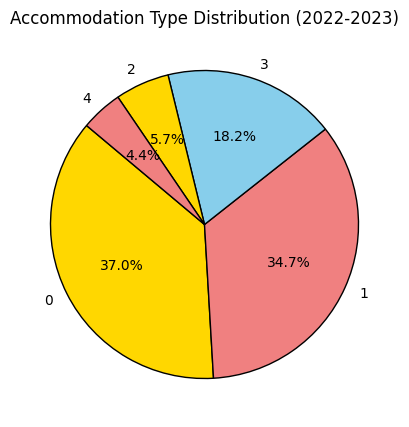

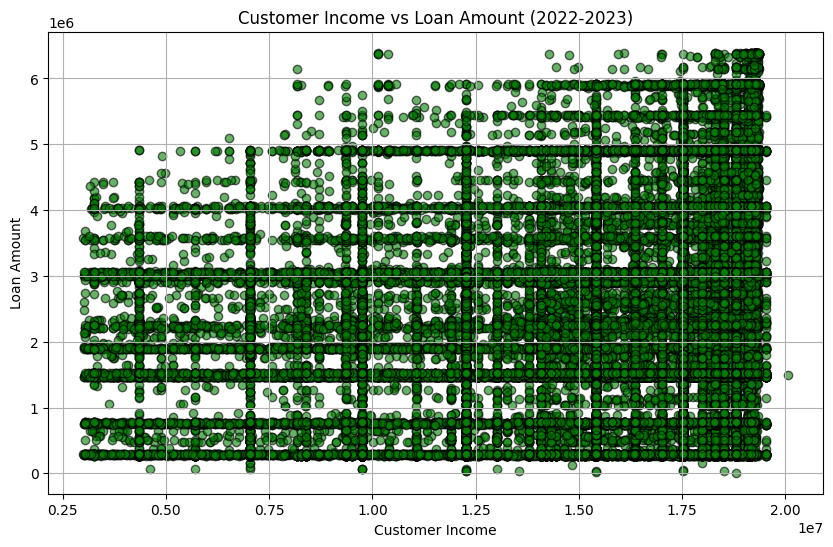

In [ ]:
import matplotlib.pyplot as plt

# EDA for demographic characteristics of customers in 2022 and 2023

# Analyzing ACCOMMODATION_TYPE distribution
plt.figure(figsize=(8, 5))
merged_data['ACCOMMODATION_TYPE'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['gold', 'lightcoral', 'skyblue'], wedgeprops=dict(edgecolor='k'))
plt.title('Accommodation Type Distribution (2022-2023)')
plt.ylabel('')
plt.show()

print()
# Analyzing the relationship between CUSTOMER_INCOME and LOAN_AMOUNT
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['CUSTOMER_INCOME'], merged_data['LOAN_AMOUNT'], alpha=0.6, c='green', edgecolor='k')
plt.title('Customer Income vs Loan Amount (2022-2023)')
plt.xlabel('Customer Income')
plt.ylabel('Loan Amount')
plt.grid(True)
plt.show()

# Define loan origin

Code EDA loan_origin dataset (Visualized data)

We have obtained a cleaned dataset from load_origin_cleaned.csv. Next, we will proceed with exploratory data analysis (EDA) to assess the data's quality and gain initial insights.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('loan_origin_cleaned.csv')
df.head(10)

DISBURSEMENT_CHANNEL  LIQUIDITY  INSURANCE_COMPANY  INSURANCE_RATE DISBURSEMENT_DATE  \
0                     1          3                  0            3.75           2023-09   
1                     2          3                  1            3.75           2023-09   
2                     1          1                  0            3.75           2023-09   
3                     1          1                  0            3.75           2023-09   
4                     1          1                  0            3.75           2023-09   
5                     1          3                  0            3.75           2023-09   
6                     1          4                  1            3.75           2023-09   
7                     1          3                  1            3.75               NaN   
8                     1          2                  0            3.75           2023-09   
9                     1          1                  1            3.75           2023-09   

   CONTRACT_NO  RATE HAS_INSURANCE  PRODUCT_CATEGORY  LOAN_TERM  MONTH_INTEREST  LOAN_PURPOSE  \
0       571094     3           YES                 0         36            2.00             1   
1       569518     4           YES                 1         27            2.60             3   
2       569723     2           YES                 0         24            1.70             3   
3       569818     3           YES                 2         27            2.00             6   
4       569794     4           YES                 3         24            1.70             3   
5       810124     3           YES                 1         24            2.40             3   
6       858618     5           YES                 3         15            3.10             6   
7       569915     5           YES                 0         24            1.70             6   
8       569760     1           YES                 0         27            1.70             3   
9       570281     3           YES                 5         36            1.00             3   

   BUSINESS_LINE  LOAN_AMOUNT  
0              1      3450000  
1              0      3060000  
2              0      1520000  
3              0      2910000  
4              0      2250000  
5              1      3060000  
6              1       510000  
7              0      4230000  
8              0      1980000  
9              1      4910000

We will examine the data types of each feature to ensure they are correctly formatted for analysis.

In [ ]:
# Check the data type
df.dtypes

DISBURSEMENT_CHANNEL      int64
LIQUIDITY                 int64
INSURANCE_COMPANY         int64
INSURANCE_RATE          float64
DISBURSEMENT_DATE        object
CONTRACT_NO               int64
RATE                      int64
HAS_INSURANCE            object
PRODUCT_CATEGORY          int64
LOAN_TERM                 int64
MONTH_INTEREST          float64
LOAN_PURPOSE              int64
BUSINESS_LINE             int64
LOAN_AMOUNT               int64
dtype: object

We dropped the `CONTRACT_NO`,`DISBURSEMENT_DATE` and `HAS_INSURANCE` columns, as it does not provide value for visualizing or gaining insights from the data.

In [ ]:
# Dropping the irrelevant columns
df = df.drop(['CONTRACT_NO','DISBURSEMENT_DATE','HAS_INSURANCE'],axis =1)
df.head(10)

DISBURSEMENT_CHANNEL  LIQUIDITY  INSURANCE_COMPANY  INSURANCE_RATE  RATE  PRODUCT_CATEGORY  \
0                     1          3                  0            3.75     3                 0   
1                     2          3                  1            3.75     4                 1   
2                     1          1                  0            3.75     2                 0   
3                     1          1                  0            3.75     3                 2   
4                     1          1                  0            3.75     4                 3   
5                     1          3                  0            3.75     3                 1   
6                     1          4                  1            3.75     5                 3   
7                     1          3                  1            3.75     5                 0   
8                     1          2                  0            3.75     1                 0   
9                     1          1                  1            3.75     3                 5   

   LOAN_TERM  MONTH_INTEREST  LOAN_PURPOSE  BUSINESS_LINE  LOAN_AMOUNT  
0         36            2.00             1              1      3450000  
1         27            2.60             3              0      3060000  
2         24            1.70             3              0      1520000  
3         27            2.00             6              0      2910000  
4         24            1.70             3              0      2250000  
5         24            2.40             3              1      3060000  
6         15            3.10             6              1       510000  
7         24            1.70             6              0      4230000  
8         27            1.70             3              0      1980000  
9         36            1.00             3              1      4910000

Next, we check for any null values across all columns.

In [ ]:
# Check missing values
print(df.isnull().sum())

DISBURSEMENT_CHANNEL    0
LIQUIDITY               0
INSURANCE_COMPANY       0
INSURANCE_RATE          0
RATE                    0
PRODUCT_CATEGORY        0
LOAN_TERM               0
MONTH_INTEREST          0
LOAN_PURPOSE            0
BUSINESS_LINE           0
LOAN_AMOUNT             0
dtype: int64


We used `df.describe()` to generate summary statistics for the numeric columns in the dataset, providing insights into key metrics such as count, mean, standard deviation, minimum, and maximum values, as well as the 25th, 50th, and 75th percentiles.

In [ ]:
# Summary statistic
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

DISBURSEMENT_CHANNEL  LIQUIDITY  INSURANCE_COMPANY  INSURANCE_RATE      RATE  \
count             270850.00  270850.00          270850.00       270850.00 270850.00   
mean                   1.20       3.00               0.50            3.31      2.51   
std                    0.49       1.42               0.50            0.44      1.59   
min                    0.00       1.00               0.00            0.50      0.00   
25%                    1.00       2.00               0.00            3.00      1.00   
50%                    1.00       3.00               1.00            3.50      3.00   
75%                    1.00       4.00               1.00            3.75      4.00   
max                    4.00       5.00               1.00            4.00      5.00   

       PRODUCT_CATEGORY  LOAN_TERM  MONTH_INTEREST  LOAN_PURPOSE  BUSINESS_LINE  LOAN_AMOUNT  
count         270850.00  270850.00       270850.00     270850.00      270850.00    270850.00  
mean               2.64      24.83            2.01          3.60           0.31   2536189.23  
std                2.91       8.31            0.60          1.48           0.68   1497609.60  
min                0.00       0.00            0.00          0.00           0.00     10000.00  
25%                1.00      18.00            1.70          3.00           0.00   1470000.00  
50%                2.00      24.00            2.20          3.00           0.00   2385645.00  
75%                4.00      36.00            2.50          4.00           0.00   3540000.00  
max               18.00      36.00            3.50          6.00           3.00   6390000.00

We used a heatmap to visualize the correlation matrix, helping us identify relationships and potential patterns between the features.

DISBURSEMENT_CHANNEL  LIQUIDITY  INSURANCE_COMPANY  INSURANCE_RATE  RATE  \
DISBURSEMENT_CHANNEL                  1.00      -0.00               0.05           -0.33 -0.00   
LIQUIDITY                            -0.00       1.00               0.00           -0.00 -0.00   
INSURANCE_COMPANY                     0.05       0.00               1.00           -0.05 -0.00   
INSURANCE_RATE                       -0.33      -0.00              -0.05            1.00 -0.00   
RATE                                 -0.00      -0.00              -0.00           -0.00  1.00   
PRODUCT_CATEGORY                      0.25      -0.00               0.03           -0.23  0.01   
LOAN_TERM                            -0.10      -0.00              -0.02            0.21 -0.00   
MONTH_INTEREST                       -0.09       0.00              -0.02            0.27 -0.01   
LOAN_PURPOSE                         -0.06      -0.00              -0.00           -0.02 -0.01   
BUSINESS_LINE                         0.10       0.00               0.01            0.33 -0.01   
LOAN_AMOUNT                          -0.07      -0.00              -0.02            0.19  0.00   

                      PRODUCT_CATEGORY  LOAN_TERM  MONTH_INTEREST  LOAN_PURPOSE  BUSINESS_LINE  \
DISBURSEMENT_CHANNEL              0.25      -0.10           -0.09         -0.06           0.10   
LIQUIDITY                        -0.00      -0.00            0.00         -0.00           0.00   
INSURANCE_COMPANY                 0.03      -0.02           -0.02         -0.00           0.01   
INSURANCE_RATE                   -0.23       0.21            0.27         -0.02           0.33   
RATE                              0.01      -0.00           -0.01         -0.01          -0.01   
PRODUCT_CATEGORY                  1.00      -0.06           -0.29         -0.10          -0.03   
LOAN_TERM                        -0.06       1.00           -0.08          0.00          -0.02   
MONTH_INTEREST                   -0.29      -0.08            1.00          0.03           0.05   
LOAN_PURPOSE                     -0.10       0.00            0.03          1.00          -0.03   
BUSINESS_LINE                    -0.03      -0.02            0.05         -0.03           1.00   
LOAN_AMOUNT                       0.04       0.55           -0.27         -0.03           0.03   

                      LOAN_AMOUNT  
DISBURSEMENT_CHANNEL        -0.07  
LIQUIDITY                   -0.00  
INSURANCE_COMPANY           -0.02  
INSURANCE_RATE               0.19  
RATE                         0.00  
PRODUCT_CATEGORY             0.04  
LOAN_TERM                    0.55  
MONTH_INTEREST              -0.27  
LOAN_PURPOSE                -0.03  
BUSINESS_LINE                0.03  
LOAN_AMOUNT                  1.00

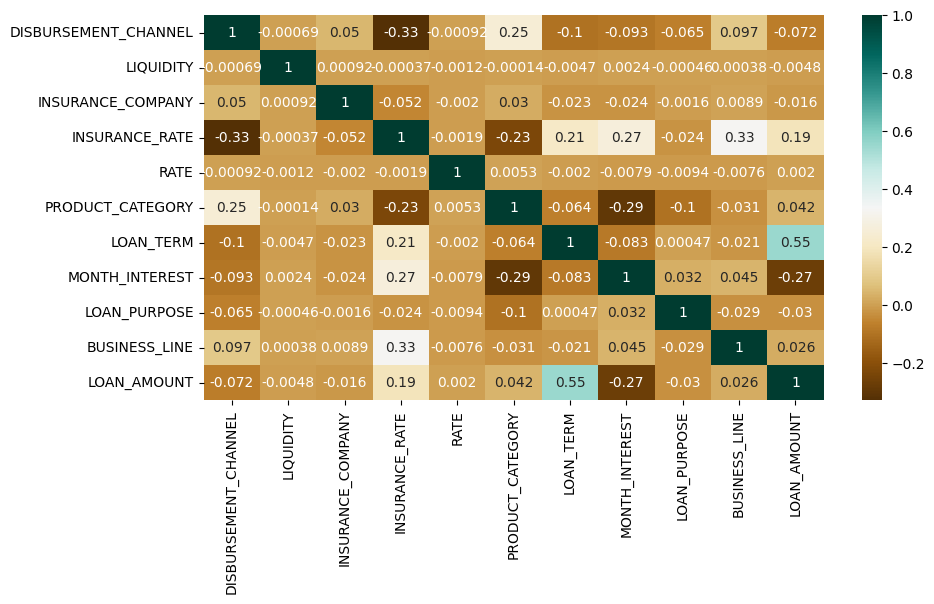

In [ ]:
# Heat Map
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

Next, we use a box plot to check for any outliers in the `LOAN_AMOUNT` column.

<Axes: xlabel='LOAN_AMOUNT'>

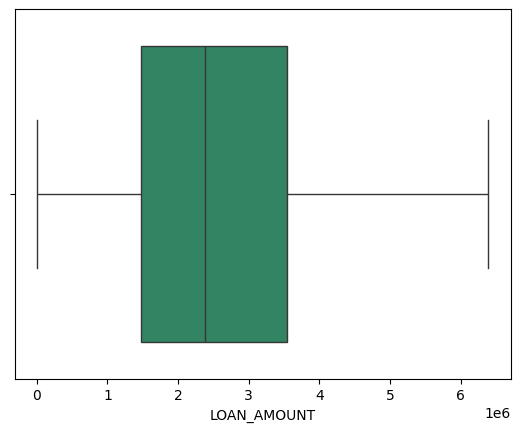

In [ ]:
sns.boxplot(x=df['LOAN_AMOUNT'])

**Visualization**

First, we will visualize each column to examine the distribution of the data.

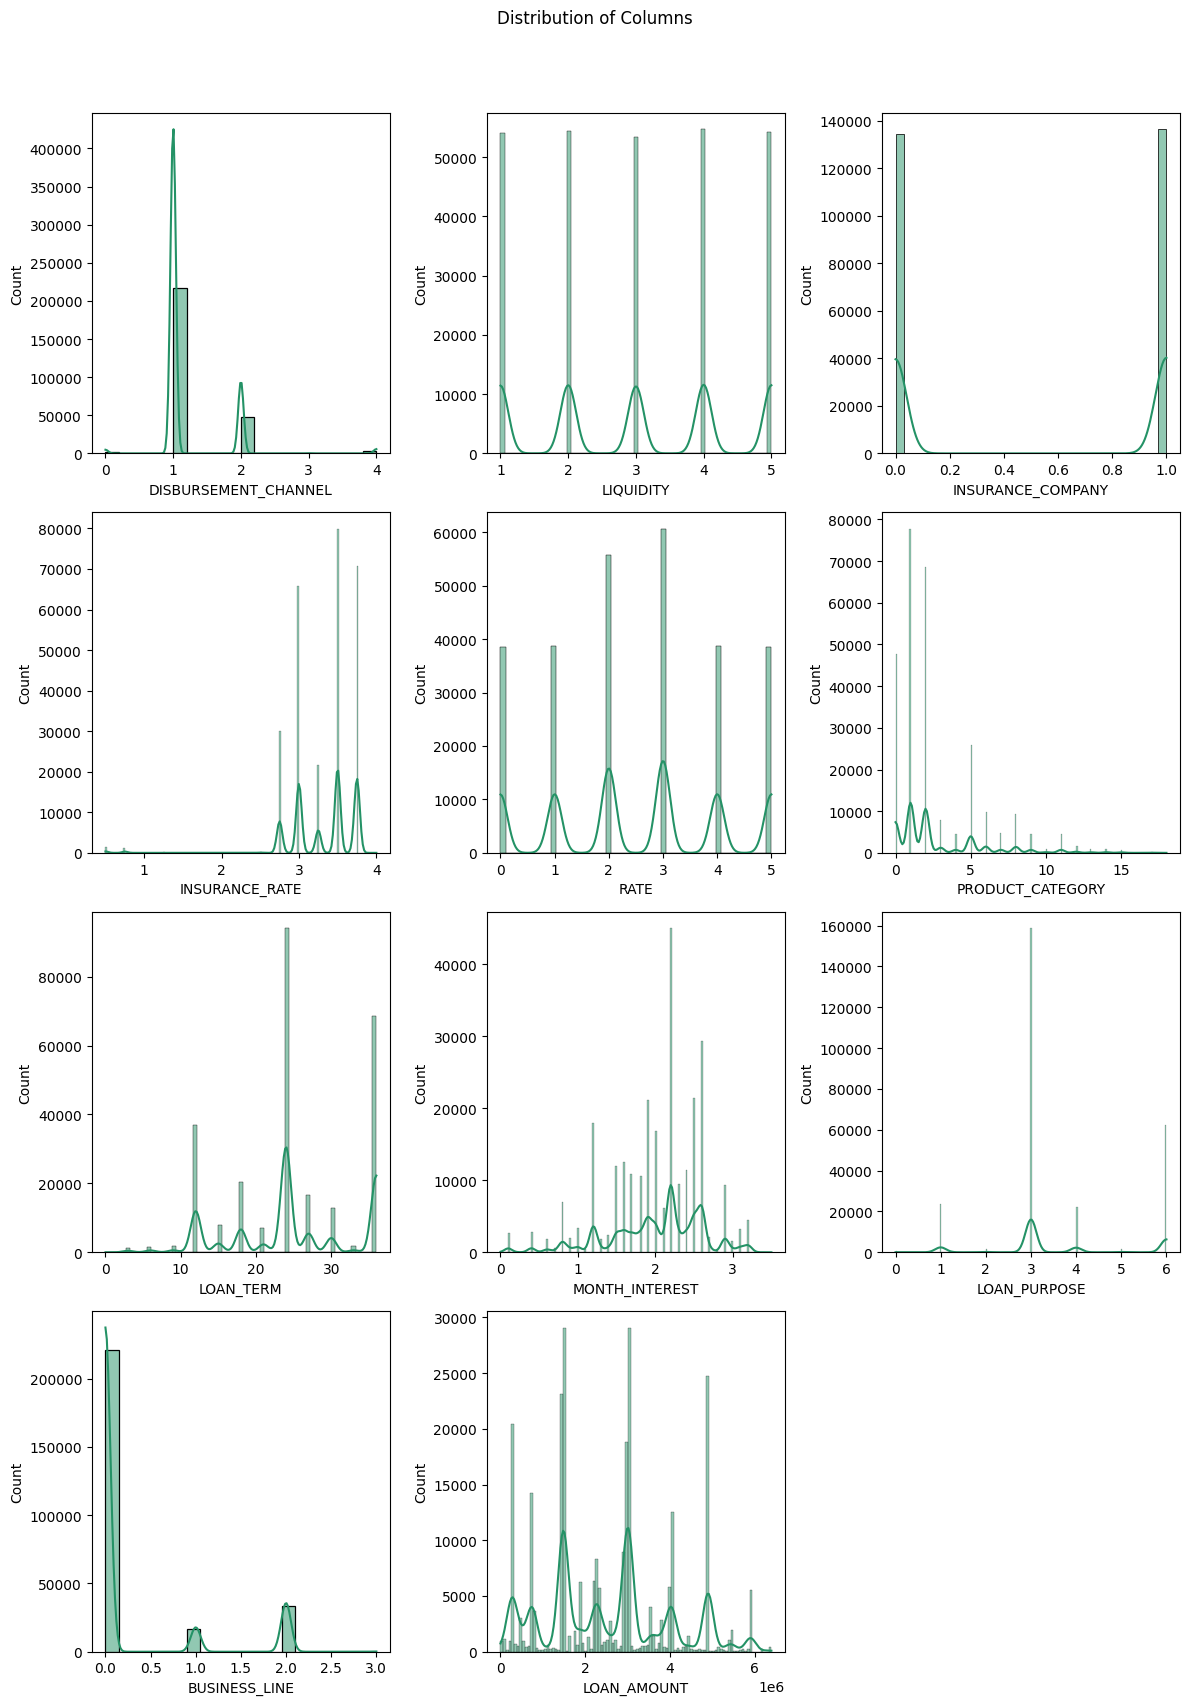

In [ ]:
# Set the seaborn palette
sns.set_palette('summer')

# Adjust the subplot grid size to accommodate all columns
fig, ax = plt.subplots(7, 3, figsize=(12, 28))  # Increased rows to 7 (19 columns / 3 columns per row ≈ 6.33, rounded up to 7)

# Flatten the ax array to simplify indexing
ax = ax.flatten()

# Loop through all columns and plot their distribution
for i, col in enumerate(df.columns):
    sns.histplot(df[col], kde=True, ax=ax[i])  # Now use ax[i] to index the flattened array

# Remove any remaining empty plots
for j in range(len(df.columns), len(ax)):
    fig.delaxes(ax[j])

fig.suptitle('Distribution of Columns', y=1.02)
plt.tight_layout()
plt.show()

We replaced the labels in the `LOAN_PURPOSE` column with more detailed descriptions of the loan purposes.

In [ ]:
df['LOAN_PURPOSE'] = df['LOAN_PURPOSE'].replace({
    0: 'Healthcare',
    1: 'Accomodation',
    2: 'Education',
    3: 'Shopping',
    4: 'Bills',
    5: 'Travel',
    6: 'Vehicle'
})

In [ ]:
df.head(10)

DISBURSEMENT_CHANNEL  LIQUIDITY  INSURANCE_COMPANY  INSURANCE_RATE  RATE  PRODUCT_CATEGORY  \
0                     1          3                  0            3.75     3                 0   
1                     2          3                  1            3.75     4                 1   
2                     1          1                  0            3.75     2                 0   
3                     1          1                  0            3.75     3                 2   
4                     1          1                  0            3.75     4                 3   
5                     1          3                  0            3.75     3                 1   
6                     1          4                  1            3.75     5                 3   
7                     1          3                  1            3.75     5                 0   
8                     1          2                  0            3.75     1                 0   
9                     1          1                  1            3.75     3                 5   

   LOAN_TERM  MONTH_INTEREST  LOAN_PURPOSE  BUSINESS_LINE  LOAN_AMOUNT  
0         36            2.00  Accomodation              1      3450000  
1         27            2.60      Shopping              0      3060000  
2         24            1.70      Shopping              0      1520000  
3         27            2.00       Vehicle              0      2910000  
4         24            1.70      Shopping              0      2250000  
5         24            2.40      Shopping              1      3060000  
6         15            3.10       Vehicle              1       510000  
7         24            1.70       Vehicle              0      4230000  
8         27            1.70      Shopping              0      1980000  
9         36            1.00      Shopping              1      4910000

We will visualize the table that presents the average LOAN_AMOUNT for each combination of PRODUCT_CATEGORY and LOAN_PURPOSE, calculated using the mean and rounded to three decimal places.

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


columns_to_show = ['LOAN_AMOUNT']
table1 = pd.pivot_table(df,
                               index=['PRODUCT_CATEGORY','LOAN_PURPOSE'],
                               values=columns_to_show,
                               aggfunc='mean').round(3)
table1

LOAN_AMOUNT
PRODUCT_CATEGORY LOAN_PURPOSE             
0                Accomodation   2617072.91
                 Bills          1915655.09
                 Education      2249016.49
                 Healthcare     2548571.43
                 Shopping       1741154.94
                 Travel         1635513.48
                 Vehicle        2035603.42
1                Accomodation   2980602.83
                 Bills          2283791.41
                 Education      2504826.47
                 Healthcare     1900000.00
                 Shopping       2242081.32
                 Travel         2290463.63
                 Vehicle        2467379.83
2                Accomodation   3604506.04
                 Bills          2887536.97
                 Education      3125837.78
                 Healthcare     2594538.78
                 Shopping       2803597.84
                 Travel         2647919.48
                 Vehicle        2972459.17
3                Accomodation   2085151.99
                 Bills          2162874.44
                 Education       500182.87
                 Healthcare      394683.52
                 Shopping       1698956.25
                 Travel          642030.41
                 Vehicle        1716826.38
4                Accomodation   4678810.66
                 Bills          3860151.88
                 Education      4771574.36
                 Healthcare     4890000.00
                 Shopping       4324507.25
                 Travel         3730947.75
                 Vehicle        4442125.46
5                Accomodation   4353249.30
                 Bills          3440077.18
                 Education      3973983.90
                 Healthcare     1826666.67
                 Shopping       3678910.98
                 Travel         3673972.46
                 Vehicle        3807564.83
6                Accomodation   2297893.75
                 Bills          1639064.02
                 Education      2088972.64
                 Healthcare     1256666.67
                 Shopping       1703220.26
                 Travel         2473499.54
                 Vehicle        2064402.25
7                Accomodation   3037251.53
                 Bills          2782749.97
                 Education      3031032.83
                 Shopping       2526266.39
                 Travel         2530031.91
                 Vehicle        2777791.04
8                Accomodation   3105102.63
                 Bills          2748970.26
                 Education      2290674.56
                 Healthcare     2150924.00
                 Shopping       2248401.24
                 Travel         3406517.75
                 Vehicle        2665313.51
9                Accomodation   3448194.65
                 Bills          2492018.72
                 Education      2041000.00
                 Healthcare      750000.00
                 Shopping       2258413.95
                 Travel         2770000.00
                 Vehicle        2682332.26
10               Accomodation   2025799.30
                 Bills          2430216.87
                 Education      2225000.00
                 Shopping       1664764.82
                 Travel         1460000.00
                 Vehicle        2142251.89
11               Accomodation   3015053.91
                 Bills          2371490.69
                 Education      2355833.33
                 Healthcare     1394606.50
                 Shopping       2417181.61
                 Travel         1825644.68
                 Vehicle        2572306.07
12               Accomodation    121224.87
                 Bills           127494.79
                 Education       117614.63
                 Healthcare       91394.65
                 Shopping        123490.56
                 Travel           90456.62
                 Vehicle         128051.23
13               Accomodation   2413219.54
                 Bills          2621497.00
                 Education      

In [ ]:
import plotly.express as px
import pandas as pd

# Check if the pivot table is not empty before continuing
if not table1.empty:
    # Reset the index of the pivot table to prepare for melting
    table1_reset = table1.reset_index()

    # Convert PRODUCT_CATEGORY to string if it's numeric (to treat it as categorical)
    table1_reset['PRODUCT_CATEGORY'] = table1_reset['PRODUCT_CATEGORY'].astype(str)

    # Melt the pivot table to convert it into a long format suitable for a bar plot
    table1_long = table1_reset.melt(id_vars=["PRODUCT_CATEGORY", "LOAN_PURPOSE"],
                                    value_vars=["LOAN_AMOUNT"], # Ensure value_vars is correct
                                    value_name="MEAN_LOAN_AMOUNT")

    # Create a bar plot using Plotly
    fig = px.bar(
        table1_long,
        x="PRODUCT_CATEGORY",
        y="MEAN_LOAN_AMOUNT",
        color="LOAN_PURPOSE",
        barmode="group",
        title="Table 1: Mean Loan Amount by Product Category and Loan Purpose",
        labels={"MEAN_LOAN_AMOUNT": "Mean Loan Amount", "PRODUCT_CATEGORY": "Product Category"}
    )

    # Show the plot
    fig.show()
else:
    print("The pivot table is empty, no data to plot.")


We will use a heatmap and a bar plot to visualize the table that presents the average `MONTH_INTEREST` for each combination of `RATE` and `LOAN_TERM`, calculated using the mean and rounded to three decimal places

In [ ]:
table2 = pd.pivot_table(df,index='RATE',columns='LOAN_TERM',values='MONTH_INTEREST',aggfunc='mean').round(3)
table2

LOAN_TERM   0    3    6    9    12   15   18   21   24   27   30   33   36
RATE                                                                      
0         0.10 0.12 0.51 2.76 2.15 2.21 2.11 2.14 2.09 1.95 1.81 1.77 1.91
1         0.10 0.12 0.65 2.72 2.13 2.15 2.12 2.07 2.08 1.94 1.80 1.86 1.91
2          NaN 0.11 0.57 2.80 2.16 2.20 2.11 2.10 2.10 1.96 1.76 1.78 1.93
3          NaN 0.11 0.49 2.78 2.11 2.22 2.13 2.05 2.06 1.93 1.82 1.73 1.88
4         0.00 0.11 0.51 2.81 2.12 2.17 2.11 2.09 2.07 1.95 1.81 1.70 1.89
5          NaN 0.13 0.42 2.69 2.11 2.19 2.12 2.08 2.08 1.94 1.83 1.80 1.91

In [ ]:
import plotly.express as px

fig = px.imshow(table2, text_auto=True, aspect="auto", color_continuous_scale="Blues")

# Update layout
fig.update_layout(
    title="Table 2: Heatmap of Monthly Interest by Rate and Loan Term",
    xaxis_title="LOAN_TERM",
    yaxis_title="RATE"
)

fig.show()

In [ ]:
table_long = table2.reset_index().melt(id_vars='RATE', var_name='LOAN_TERM', value_name='MONTH_INTEREST')

# Create a bar plot
fig = px.bar(
    table_long,
    x='RATE',
    y='MONTH_INTEREST',
    color='LOAN_TERM',
    barmode='group',
    title="Table 2: Monthly Interest by Rate and Loan Term"
)

# Show plot
fig.show()

The next table presents the average `MONTH_INTEREST` for each combination of `LOAN_AMOUNT_RANGE` and `RATE`, calculated using the mean and rounded to three decimal places. The `LOAN_AMOUNT_RANGE` is created by dividing the LOAN_AMOUNT into four equal-sized bins (Small, Medium, Large, Very Large) using `qcut()`. We then visualize this data using a grouped bar plot.

In [ ]:
amount_loan_range = ['Small', 'Medium', 'Large', 'Very Large']

df['LOAN_AMOUNT_RANGE'] = pd.qcut(df['LOAN_AMOUNT'], q = 4, labels = amount_loan_range)
table3 = pd.pivot_table(df, index = ['LOAN_AMOUNT_RANGE','RATE'], values='MONTH_INTEREST').round(3)
table3

<ipython-input-42-5400097435af>:4: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



MONTH_INTEREST
LOAN_AMOUNT_RANGE RATE                
Small             0               2.10
                  1               2.09
                  2               2.11
                  3               2.10
                  4               2.09
                  5               2.10
Medium            0               2.19
                  1               2.18
                  2               2.18
                  3               2.18
                  4               2.18
                  5               2.18
Large             0               2.07
                  1               2.06
                  2               2.08
                  3               2.04
                  4               2.04
                  5               2.06
Very Large        0               1.72
                  1               1.71
                  2               1.72
                  3               1.68
                  4               1.70
                  5               1.71

In [ ]:
# Reset the index of the pivot table to prepare for plotting
table3_reset = table3.reset_index()

# Create a bar plot using Plotly and add numbers on each bar
fig = px.bar(
    table3_reset,
    x="LOAN_AMOUNT_RANGE",      # x-axis: loan amount ranges
    y="MONTH_INTEREST",         # y-axis: monthly interest
    color="RATE",               # color bars by the RATE
    barmode="group",            # group the bars, splitting by RATE
    title="Table 3: Monthly Interest by Loan Amount Range and Rate",
    labels={"MONTH_INTEREST": "Monthly Interest", "LOAN_AMOUNT_RANGE": "Loan Amount Range", "RATE": "Rate"},
    text_auto=True
)

# Show the plot
fig.show()

Finally, The table `table4` presents the average `LOAN_AMOUNT` for each `LOAN_TERM`, calculated using the mean and rounded to three decimal places. This table helps in understanding how the average loan amount varies with different loan terms, which can be further visualized.

In [ ]:
table4 = pd.pivot_table(df,index='LOAN_TERM',values='LOAN_AMOUNT',aggfunc='mean').round(3)
table4

LOAN_AMOUNT
LOAN_TERM             
0            130000.00
3             76638.28
6            310072.31
9            508086.66
12          1186487.36
15          1585016.22
18          1951683.58
21          2160794.72
24          2479513.27
27          2849862.44
30          3400751.45
33          3191091.32
36          3559339.70

In [ ]:
fig = px.line(table4,
              x=table4.index,
              y='LOAN_AMOUNT',
              title='Table 4: Average Loan Amount by Loan Term',
              labels={'LOAN_AMOUNT': 'Loan Amount', 'LOAN_TERM': 'Loan Term (Years)'}
             )

# Show the plot
fig.show()

Based on the results of the correlation matrix and visualized data, we identified the key patterns, trends and data anomalies:
1. **Table 1:  The average LOAN_AMOUNT for each combination of PRODUCT_CATEGORY and LOAN_PURPOSE.** <br>
- Key pattern: There are distinct clusters of loan purposes, with some categories showing more consistent loan amounts across product categories (e.g. Education, Healthcare) and others showing more variability (e.g. Accomodation, Shopping, Vehicle).
The loan amounts generally increase as the product category index increases, suggesting larger loan amounts for more advanced or complex product categories.

- Trends: Overall, the mean loan amount tends to increase from left to right on the x-axis, indicating that higher-numbered product categories tend to have higher average loan amounts.
The Accomodation and Bills loan purposes show an upward trend in loan amounts as the product category index increases.
The Education and Healthcare loan purposes maintain relatively stable, lower loan amounts across most product categories.

- Anomalies:
There are some sharp spikes and dips in the mean loan amounts, particularly for the Accomodation, Bills, and Vehicle loan purposes. This suggests there may be outlier data points or significant variability in the loan amounts for those purposes across the product categories.
The Shopping loan purpose shows a large spike in mean loan amount for product category 18, which is significantly higher than the surrounding data points for that loan purpose.
The Vehicle loan purpose has an unusually low mean loan amount for product category 0 compared to the rest of the data for that purpose.

2. **Table 2: the average MONTH_INTEREST for each combination of RATE and LOAN_TERM.**<br>
- Patterns:

There is a clear diagonal band of higher interest rates as the loan term increases, indicating that longer loan terms generally have higher monthly interest rates.
Certain loan term lengths (e.g. 0, 6, 12, 18, 24, 30, 36) appear to be more common or preferred, as evidenced by the clusters of data points for those term lengths.

- Trends:

As the interest rate increases from 0 to 5, the monthly interest generally increases across all loan term lengths.
The differences in monthly interest between adjacent loan term lengths becomes larger as the term length increases. For example, the difference between 0 and 3 months is smaller than the difference between 24 and 27 months.

- Anomalies:

There are a few data points that seem to deviate from the overall trend, such as the lower-than-expected monthly interest for the 33-month loan term at interest rates around 3-4.
The 27-month loan term has slightly higher monthly interest compared to the 30-month term at some interest rate levels, which is unexpected given the general trend.
The 0-month loan term has a unique pattern, with a sharp increase in monthly interest between rates 0 and 1, rather than the more gradual increase seen in the other loan term lengths.
3.  **Table 3: the average `MONTH_INTEREST` for each combination of `LOAN_AMOUNT_RANGE` and `RATE`**<br>
- Pattern:

The graph shows the monthly interest by loan amount range and rate, categorized into four loan amount ranges: Small, Medium, Large, and Very Large.
Within each loan amount range, the interest rate increases as the loan amount increases.


- Trends:

As the loan amount range increases from Small to Very Large, the monthly interest generally increases across all interest rate levels.
The interest rate follows a consistent trend, increasing from the lowest rate to the highest rate within each loan amount range.


- Anomalies:

There are no obvious anomalies or outliers in the data presented in the graph. The values seem to follow a logical and consistent pattern based on the loan amount ranges and interest rates.
4. **Table 4: Average Loan Amount by Loan Term** <br>
- Pattern:

The graph shows the average loan amount by loan term, measured in years.
The loan amount increases as the loan term length increases.


- Trends:

There is a clear upward trend in the average loan amount as the loan term increases.
The loan amount grows steadily, starting from a relatively low value at the shorter loan terms and increasing more rapidly at the longer loan terms.
The graph has a smooth, consistent curve, indicating a linear relationship between loan term and average loan amount.


- Observations:

At the shortest loan term of 0 years, the average loan amount is the lowest, around $\$0.5$ million. As the loan term increases, the average loan amount rises, reaching around $3.5 million at the longest loan term of 35 years.

- Anomalies:
The graph shows a clear and gradual increase in the average loan amount as the loan term gets longer, without any major deviations or anomalies.
